---
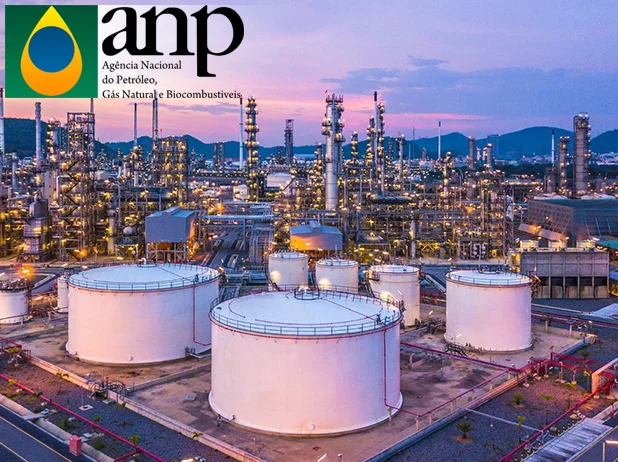


---




#<font color='green'> Descrição do Projeto:</font>


---


##<font color='yellow'>I - Introdução</font>
Você e a sua equipe foram escalados pela `Agência Nacional de Petróleo e Gás Natural e Biocombustíveis (ANP)`para realizar uma análise exploratória relacionada à série histórica de preço de venda da gasolina e do etanol. ANP é um centro de referência em dados e informações sobre a indústria de petróleo e gás natural:


*   mantém o Banco de Dados de Exploração e Produção (BDEP);
*   promove estudos sobre o potencial petrolífero e o desenvolvimento do setor;
*   recebe e torna públicas as notificações de descobertas;
*   divulga as estatísticas oficiais sobre reservas, refino e produção de petróleo, gás e biocombustíveis no Brasil.



A `ANP` também realiza e divulga rotineiramente pesquisas sobre qualidade dos combustíveis e lubrificantes e sobre o comportamento dos preços desses produtos. Consolida e divulga informações sobre os mercados regulados e acerca dos investimentos em pesquisa, inovação e formação profissional voltadas para os setores regulados.

As fontes de dados que serão utilizadas no projeto estão disponíveis no portal dados.gov. Serão utilizados os arquivos dos meses de junho e julho de 2021 contendo a série histórica dos preços da gasolina e do etanol em todo o Brasil. Para baixar os arquivos, basta clicar nos meses que estão destacados anteriormente.

---



##<font color='yellow'>II - As perguntas a serem respondidas são:</font>


01.   Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?
02.   Qual o preço médio da gasolina e do etanol nesses dois meses?
03.   Quais os 5 estados com o preço médio da gasolina e do etanol mais
caros?
04.   Qual o preço médio da gasolina e do etanol por estado?
05.   Qual o município que possui o menor preço para a gasolina e para o etanol?
06.   Qual o município que possui o maior preço para a gasolina e para o etanol?
07.   Qual a região que possui o maior valor médio da gasolina?
08.   Qual a região que possui o menor valor médio do etanol?
09.   Há alguma relação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?
10.  Há alguma relação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

---



##<font color='yellow'>III - O projeto deverá obrigatoriamente:</font>
*   Utilizar Jupyter Notebook ou Colab;
*   Realizar a limpeza dos dados;
*   Realizar análise exploratória;
*   O notebook utilizado na análise deve estar organizado, com descrições do
passo a passo da análise em markdown, apresentação dos resultados e insights
gerados;
*   Levantar mais duas perguntas e respondê-las da forma que achar mais
adequada.

---



##<font color='yellow'>IV - Apresentação:</font>


*   Todos os integrantes do grupo deverão apresentar;
*   Apresentar a análise realizada e organizada no Jupyter Notebook ou Colab;
*   Utilize slides de apoio para sua apresentação;
*   Apresentar a modelagem realizada e organizada em um powerpoint, PDF ou alguma outra ferramenta de apresentação que permita exportação em PDF;
*   Seu grupo terá 15 minutos (no máximo) para apresentar.

---


# <font color='green'>Execução</font>

##<font color='gray'>Importação e instalação das bibliotecas a serem utilizadas</font>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

##<font color='gray'>Carregando os arquivos ".csv" da base de dados(anp)</gray>

In [ ]:
dados_junho = pd.read_csv("https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-06-gasolina-etanol.csv", sep=';')
junho = pd.DataFrame(dados_junho)

junho.head()

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA,02/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA ADITIVADA,02/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,ETANOL,01/06/2021,"6,1",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,GASOLINA,01/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0004-94,AVENIDA LAURO MULLER,943,NaN,JOÃO ALVES,69980-000,GASOLINA,02/06/2021,"6,89",NaN,R$ / litro,BRANCA


In [ ]:
dados_julho = pd.read_csv("https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-07-gasolina-etanol.csv", sep=';')
julho = pd.DataFrame(dados_julho)

julho.head()

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,GASOLINA,01/07/2021,"5,499",NaN,R$ / litro,IPIRANGA
1,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,ETANOL,01/07/2021,"5,2",NaN,R$ / litro,IPIRANGA
2,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,GASOLINA ADITIVADA,01/07/2021,"5,699",NaN,R$ / litro,IPIRANGA
3,NE,CE,MARACANAU,LUIZA GLAURIA R T MENEZES,03.602.329/0001-10,ESTRADA FORTALEZA MARANGUAPE,S/N,NaN,KAGADO,61901-410,GASOLINA,01/07/2021,"5,49",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,NE,CE,MARACANAU,LUIZA GLAURIA R T MENEZES,03.602.329/0001-10,ESTRADA FORTALEZA MARANGUAPE,S/N,NaN,KAGADO,61901-410,ETANOL,01/07/2021,"4,99",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.


##<font color='gray'>Alteração de `","` por `"."` em "Valor de Venda".
##Exclusão coluna "Valor de Compra" por conter todos dados nulos.</font>

In [ ]:
junho['Valor de Venda'] = junho['Valor de Venda'].apply(lambda x:x.replace(',','.')).astype(float)
del junho['Valor de Compra']
julho['Valor de Venda'] = julho['Valor de Venda'].apply(lambda x:x.replace(',','.')).astype(float)
del julho['Valor de Compra']

##<font color='gray'>Unindo os meses de Junho/Julho num só DataFrame</gray>

In [ ]:
combustiveis = pd.concat([junho, julho], ignore_index=True)

combustiveis.head()

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA,02/06/2021,6.89,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA ADITIVADA,02/06/2021,6.89,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,ETANOL,01/06/2021,6.10,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,GASOLINA,01/06/2021,6.89,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0004-94,AVENIDA LAURO MULLER,943,NaN,JOÃO ALVES,69980-000,GASOLINA,02/06/2021,6.89,R$ / litro,BRANCA


###<font color='red'>Inspecionando: </font>

*   `shape` - retorna as dimensões do DataFrame
*   `columns` - retorna uma lista com os nomes de todas as colunas no DataFrame
*   `index` - retorna informação sobre o índice
*   `info` - retorna informação sobre os tipos e os números de observações não-nulas no DataFrame.
*   `describe` - retorna algumas estatísticas descritivas (count, mean, std, min, 25%, 50%, 75%, max) a respeito das colunas numéricas do DataFrame




In [ ]:
combustiveis.shape

(97586, 15)

In [ ]:
combustiveis.columns

Index(['Região - Sigla', 'Estado - Sigla', 'Município', 'Revenda',
       'CNPJ da Revenda', 'Nome da Rua', 'Número Rua', 'Complemento', 'Bairro',
       'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda',
       'Unidade de Medida', 'Bandeira'],
      dtype='object')

In [ ]:
combustiveis.index

RangeIndex(start=0, stop=97586, step=1)

In [ ]:
combustiveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97586 entries, 0 to 97585
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Região - Sigla     97586 non-null  object 
 1   Estado - Sigla     97586 non-null  object 
 2   Município          97586 non-null  object 
 3   Revenda            97586 non-null  object 
 4   CNPJ da Revenda    97586 non-null  object 
 5   Nome da Rua        97586 non-null  object 
 6   Número Rua         97529 non-null  object 
 7   Complemento        19711 non-null  object 
 8   Bairro             97327 non-null  object 
 9   Cep                97586 non-null  object 
 10  Produto            97586 non-null  object 
 11  Data da Coleta     97586 non-null  object 
 12  Valor de Venda     97586 non-null  float64
 13  Unidade de Medida  97586 non-null  object 
 14  Bandeira           97586 non-null  object 
dtypes: float64(1), object(14)
memory usage: 11.2+ MB


In [ ]:
combustiveis.describe()

,Valor de Venda
count,97586.000000
mean,5.384929
std,0.715136
min,3.097000
25%,4.990000
50%,5.550000
75%,5.899000
max,7.097000


###<font color='red'>Visualização tipo de dados</font>

In [ ]:
display(combustiveis.dtypes)

Região - Sigla        object
Estado - Sigla        object
Município             object
Revenda               object
CNPJ da Revenda       object
Nome da Rua           object
Número Rua            object
Complemento           object
Bairro                object
Cep                   object
Produto               object
Data da Coleta        object
Valor de Venda       float64
Unidade de Medida     object
Bandeira              object
dtype: object

###<font color='red'>Conferir a existência de dados</font>

In [ ]:
(combustiveis.isnull().sum() / combustiveis.shape[0]).sort_values(ascending=False)

Complemento          0.798014
Bairro               0.002654
Número Rua           0.000584
Região - Sigla       0.000000
Estado - Sigla       0.000000
Município            0.000000
Revenda              0.000000
CNPJ da Revenda      0.000000
Nome da Rua          0.000000
Cep                  0.000000
Produto              0.000000
Data da Coleta       0.000000
Valor de Venda       0.000000
Unidade de Medida    0.000000
Bandeira             0.000000
dtype: float64

##HISTOGRAMA CORREÇÃO!!!

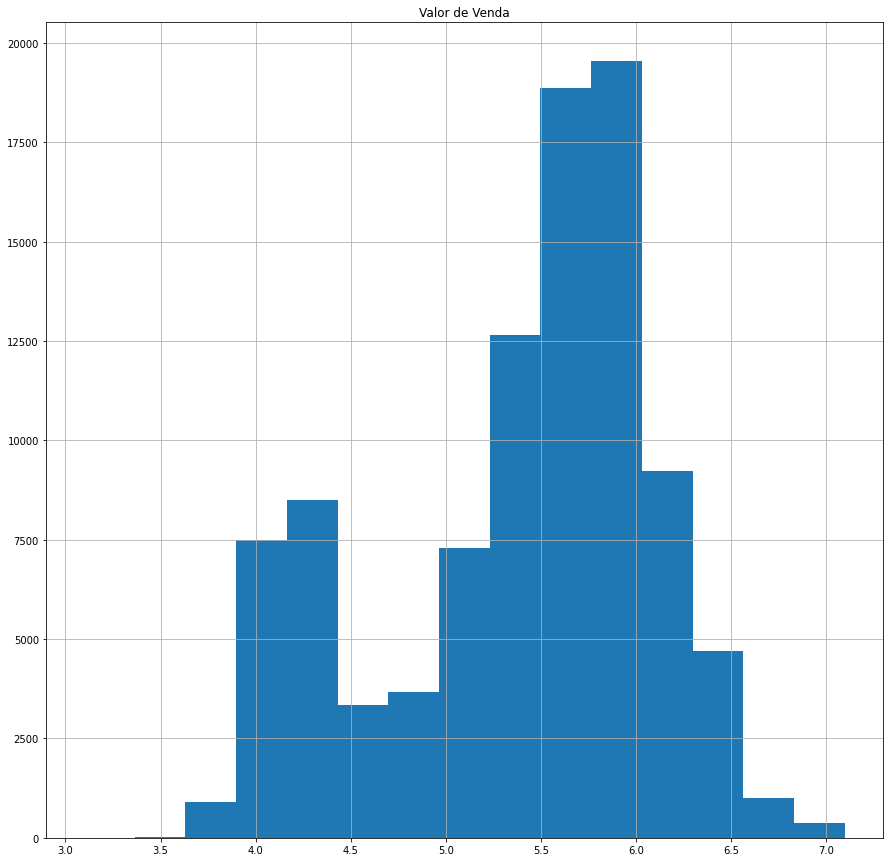

In [ ]:
combustiveis.hist(bins=15, figsize=(15,15))
#ignorar aviso
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

##<font color='gray'>Alteração dos nomes de algumas colunas</font>

In [ ]:
combustiveis.columns = ["Região", "Estado", "Município", "Revenda",
       "CNPJ da Revenda", "Nome da Rua", "Número", "Complemento", "Bairro",
       "Cep", "Produto", "Data da Coleta", "Valor de Venda",
       'Unidade de Medida', 'Bandeira']

##<font color='gray'>Combustíveis agrupados por Região</font>

*   Média de preços
*   Gráficos por tipo de combustível
*   Etanol
*   Gasolina
*   Gasolina Aditivada


In [ ]:
#Média combustíveis por Região
combustiveis_regiao = combustiveis.groupby(["Região", "Produto"])
combustiveis_regiao["Valor de Venda"].mean()

Região  Produto           
CO      ETANOL                4.406943
        GASOLINA              5.901902
        GASOLINA ADITIVADA    5.989400
N       ETANOL                5.046574
        GASOLINA              5.820873
        GASOLINA ADITIVADA    5.949940
NE      ETANOL                5.090050
        GASOLINA              5.856517
        GASOLINA ADITIVADA    5.992951
S       ETANOL                4.819885
        GASOLINA              5.705432
        GASOLINA ADITIVADA    5.845881
SE      ETANOL                4.354765
        GASOLINA              5.663083
        GASOLINA ADITIVADA    5.826678
Name: Valor de Venda, dtype: float64

###<font color='cian'>Etanol</font>

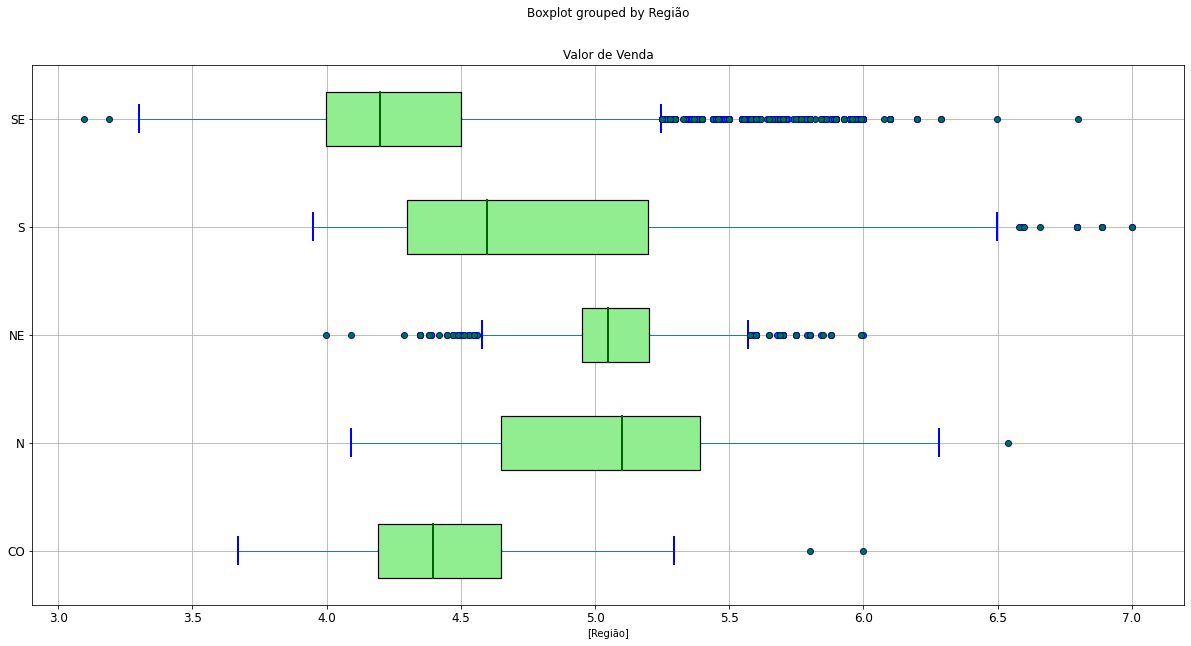

In [ ]:
#Valor Etanol por Região
etanol = combustiveis.loc[combustiveis["Produto"] == "ETANOL"].boxplot(by=["Região"],
  figsize=(20, 10),
  fontsize=12,
  vert=False,
  patch_artist=True,
  boxprops={"linewidth": 1.2, "facecolor": "lightgreen"},
  capprops={"color": "blue", "linewidth": 2},
  medianprops={"color": "darkgreen", "linewidth": 2},
  flierprops=dict(marker="o", markerfacecolor="green", 
                  markersize=6, markeredgecolor="blue"))
#ignorar aviso
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

###<font color='cian'>Gasolina</font>

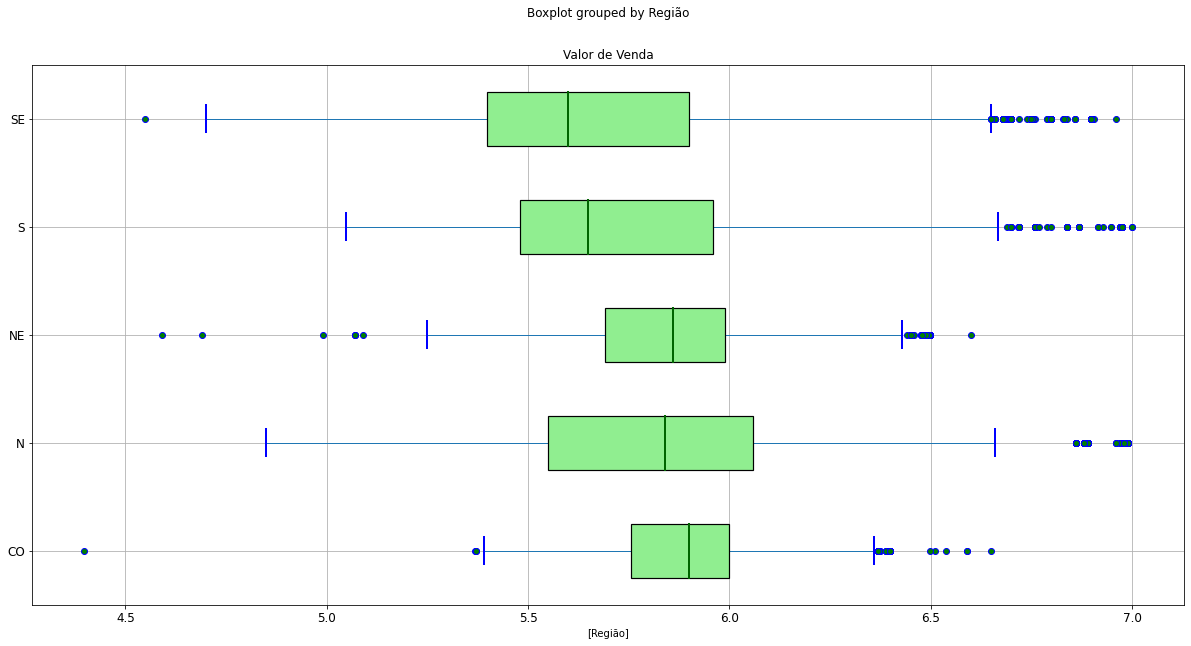

In [ ]:
#Valor Gasolina por Região
gasolina = combustiveis.loc[combustiveis["Produto"] == "GASOLINA"].boxplot(by=["Região"],
  figsize=(20, 10),
  fontsize=12,
  vert=False,
  patch_artist=True,
  boxprops={"linewidth": 1.2, "facecolor": "lightgreen"},
  capprops={"color": "blue", "linewidth": 2},
  medianprops={"color": "darkgreen", "linewidth": 2},
  flierprops=dict(marker="o", markerfacecolor="green", 
                  markersize=6, markeredgecolor="blue"))
#ignorar aviso
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

###<font color='cian'>Gasolina Aditivada</font>

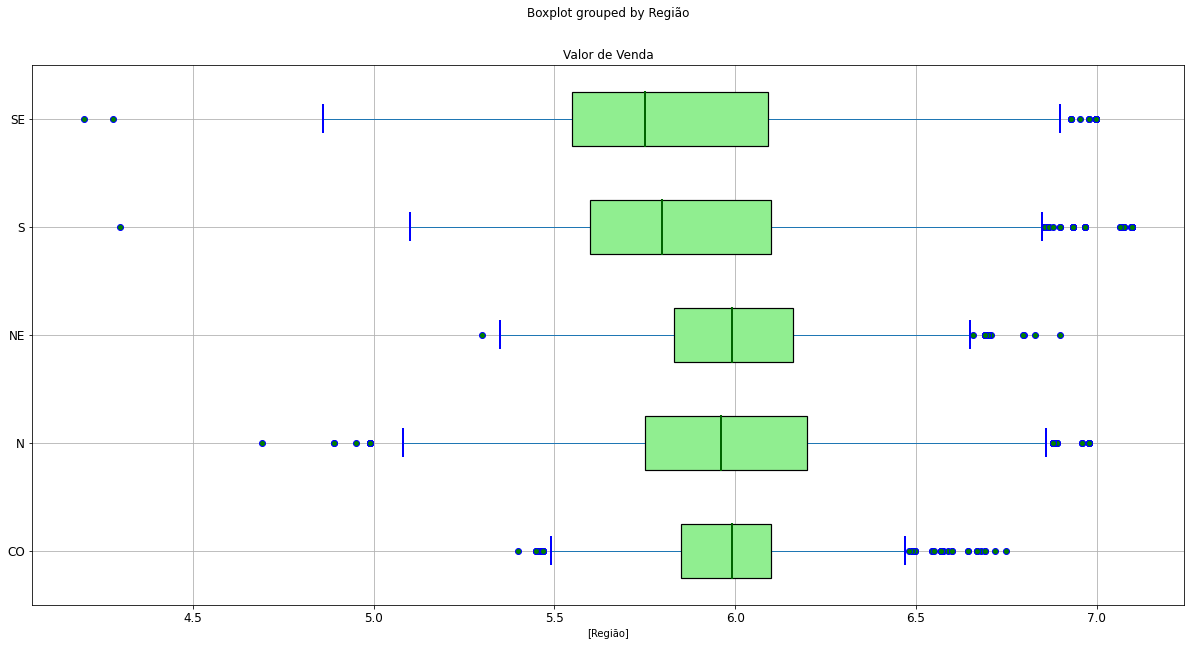

In [ ]:
gasolina_aditivada = combustiveis.loc[combustiveis["Produto"] == "GASOLINA ADITIVADA"].boxplot(by=["Região"],
  figsize=(20, 10),
  fontsize=12,
  vert=False,
  patch_artist=True,
  boxprops={"linewidth": 1.2, "facecolor": "lightgreen"},
  capprops={"color": "blue", "linewidth": 2},
  medianprops={"color": "darkgreen", "linewidth": 2},
  flierprops=dict(marker="o", markerfacecolor="green", 
                  markersize=6, markeredgecolor="blue"))
#ignorar aviso
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

####<font color='gray'>Região Nordeste</gray>

In [ ]:
combustiveis_nordeste = combustiveis.loc[combustiveis["Região"] == "NE"]
combustiveis_nordeste_etanol = combustiveis_nordeste[combustiveis_nordeste["Produto"] == "ETANOL"]["Valor de Venda"]
combustiveis_nordeste_gasolina = combustiveis_nordeste[combustiveis_nordeste["Produto"] == "GASOLINA"]["Valor de Venda"]
combustiveis_nordeste_gasolina_aditivada = combustiveis_nordeste[combustiveis_nordeste["Produto"] == "GASOLINA ADITIVADA"]["Valor de Venda"]

In [ ]:
combustiveis_nordeste_pivotado = combustiveis.loc[combustiveis["Região"] == "NE"]
combustiveis_nordeste_pivotado = combustiveis_nordeste_pivotado[["CNPJ da Revenda","Produto", 
                                                   "Data da Coleta", "Valor de Venda"]]
combustiveis_nordeste_pivotado = combustiveis_nordeste_pivotado.pivot(
  index = ["CNPJ da Revenda", "Data da Coleta"],
  columns = ["Produto"],
  values = ["Valor de Venda"]
)
combustiveis_nordeste_pivotado.columns = combustiveis_nordeste_pivotado.columns.droplevel()
combustiveis_nordeste_pivotado

Produto                             ETANOL  GASOLINA  GASOLINA ADITIVADA
CNPJ da Revenda     Data da Coleta                                      
 00.062.382/0001-88 04/07/2021       4.890     5.890               5.890
                    07/06/2021       4.890     5.890               5.890
                    19/07/2021       4.990     5.990               5.990
                    20/06/2021       4.890     5.890               5.890
 00.062.382/0002-69 07/06/2021       4.850     5.850               5.850
...                                    ...       ...                 ...
 97.430.284/0001-98 22/06/2021       4.999     5.790               5.790
 97.430.284/0003-50 05/07/2021       4.999     5.887               5.887
                    06/06/2021       4.999     5.887               5.887
                    20/06/2021       4.999     5.887               5.887
                    27/07/2021       4.999     5.950               5.950

[6761 rows x 3 columns]

In [ ]:
combustiveis_pivotado_preenchidos_com_zero = combustiveis_nordeste_pivotado.fillna(0)
combustiveis_pivotado_preenchidos_com_zero.corr()

Produto,ETANOL,GASOLINA,GASOLINA ADITIVADA
Produto,,,
ETANOL,1.000000,0.002935,0.174650
GASOLINA,0.002935,1.000000,0.033969
GASOLINA ADITIVADA,0.174650,0.033969,1.000000


In [ ]:
combustiveis_pivotado_sem_nulos = combustiveis_nordeste_pivotado.dropna()
combustiveis_pivotado_sem_nulos.corr()

Produto,ETANOL,GASOLINA,GASOLINA ADITIVADA
Produto,,,
ETANOL,1.000000,0.476608,0.434395
GASOLINA,0.476608,1.000000,0.883602
GASOLINA ADITIVADA,0.434395,0.883602,1.000000


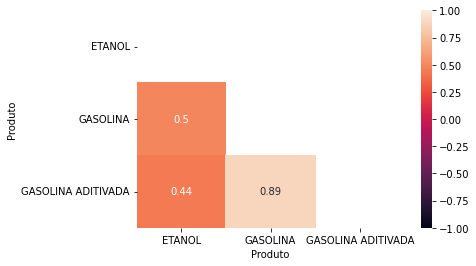

In [ ]:
correlacao = combustiveis_nordeste_pivotado.corr()
heatmap = sns.heatmap(correlacao, mask=np.triu(correlacao), vmin=-1, vmax=1, annot=True)

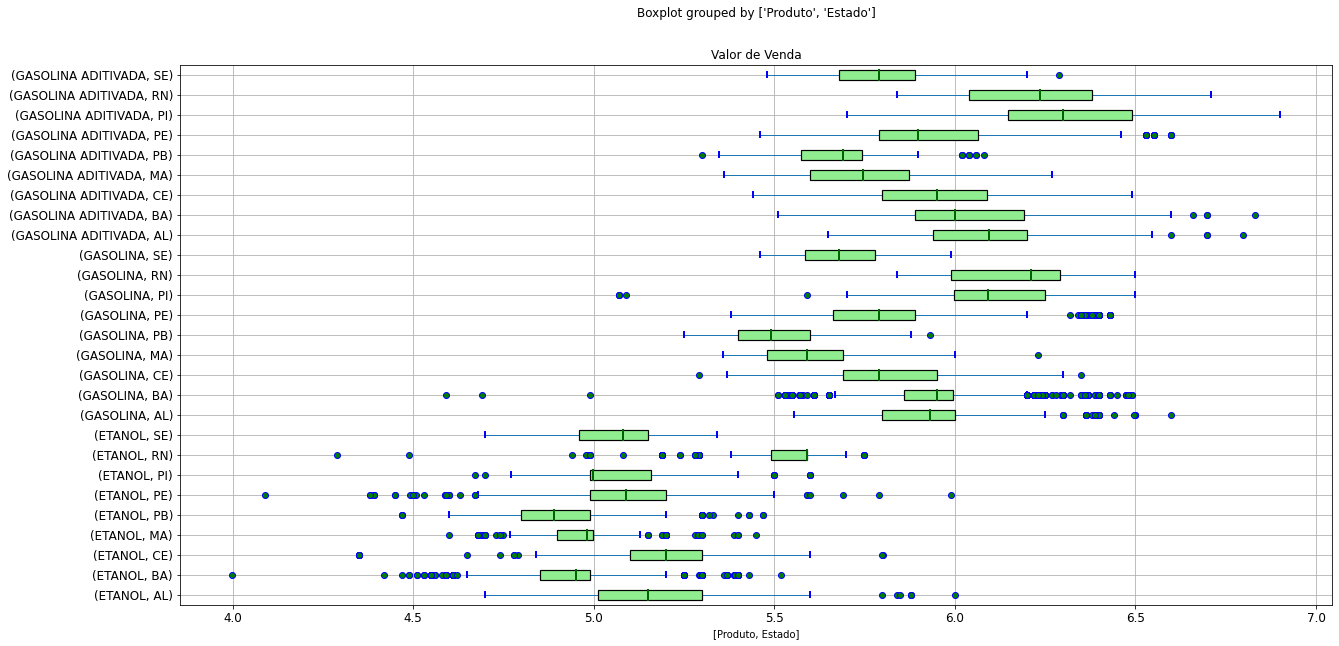

In [ ]:
combustiveis.loc[combustiveis["Região"] == "NE"].boxplot(by=["Produto", "Estado"],
  figsize=(20, 10),
  fontsize=12,
  vert=False,
  patch_artist=True,
  boxprops={"linewidth": 1.2, "facecolor": "lightgreen"},
  capprops={"color": "blue", "linewidth": 2},
  medianprops={"color": "darkgreen", "linewidth": 2},
  flierprops=dict(marker="o", markerfacecolor="green", 
                  markersize=6, markeredgecolor="blue"))
#ignorar aviso
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

####<font color='gray'>Região Norte</gray>

In [ ]:
combustiveis_norte = combustiveis.loc[combustiveis["Região"] == "N"]
combustiveis_norte_etanol = combustiveis_norte[combustiveis_norte["Produto"] == "ETANOL"]["Valor de Venda"]
combustiveis_norte_gasolina = combustiveis_norte[combustiveis_norte["Produto"] == "GASOLINA"]["Valor de Venda"]
combustiveis_norte_gasolina_aditivada = combustiveis_norte[combustiveis_norte["Produto"] == "GASOLINA ADITIVADA"]["Valor de Venda"]

In [ ]:
combustiveis_norte_pivotado = combustiveis.loc[combustiveis["Região"] == "N"]
combustiveis_norte = combustiveis_norte_pivotado[["CNPJ da Revenda","Produto", 
                                                   "Data da Coleta", "Valor de Venda"]]
combustiveis_norte_pivotado = combustiveis_norte_pivotado.pivot(
  index = ["CNPJ da Revenda", "Data da Coleta"],
  columns = ["Produto"],
  values = ["Valor de Venda"]
)
combustiveis_norte_pivotado.columns = combustiveis_norte_pivotado.columns.droplevel()
combustiveis_norte_pivotado

Produto                             ETANOL  GASOLINA  GASOLINA ADITIVADA
CNPJ da Revenda     Data da Coleta                                      
 00.319.286/0002-53 08/06/2021       4.590     5.260               5.460
                    19/07/2021         NaN     5.760               5.860
                    26/07/2021         NaN     5.760               5.860
 00.376.437/0001-24 15/06/2021       4.690     5.310               5.530
                    30/06/2021       4.690     5.360               5.510
...                                    ...       ...                 ...
 97.486.534/0002-92 04/07/2021       5.259     5.959               5.999
                    11/07/2021       5.259     6.019               6.089
 97.535.910/0001-00 15/07/2021         NaN     6.030               6.100
                    21/07/2021         NaN     6.030               6.100
                    29/07/2021         NaN     5.970               6.110

[2310 rows x 3 columns]

In [ ]:
combustiveis_pivotado_preenchidos_com_zero = combustiveis_norte_pivotado.fillna(0)
combustiveis_pivotado_preenchidos_com_zero.corr()

Produto,ETANOL,GASOLINA,GASOLINA ADITIVADA
Produto,,,
ETANOL,1.000000,-0.047084,0.273204
GASOLINA,-0.047084,1.000000,0.061736
GASOLINA ADITIVADA,0.273204,0.061736,1.000000


In [ ]:
combustiveis_pivotado_sem_nulos = combustiveis_norte_pivotado.dropna()
combustiveis_pivotado_sem_nulos.corr()

Produto,ETANOL,GASOLINA,GASOLINA ADITIVADA
Produto,,,
ETANOL,1.000000,0.786465,0.839056
GASOLINA,0.786465,1.000000,0.931461
GASOLINA ADITIVADA,0.839056,0.931461,1.000000


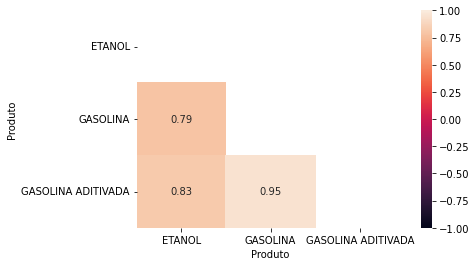

In [ ]:
correlacao = combustiveis_norte_pivotado.corr()
heatmap = sns.heatmap(correlacao, mask=np.triu(correlacao), vmin=-1, vmax=1, annot=True)

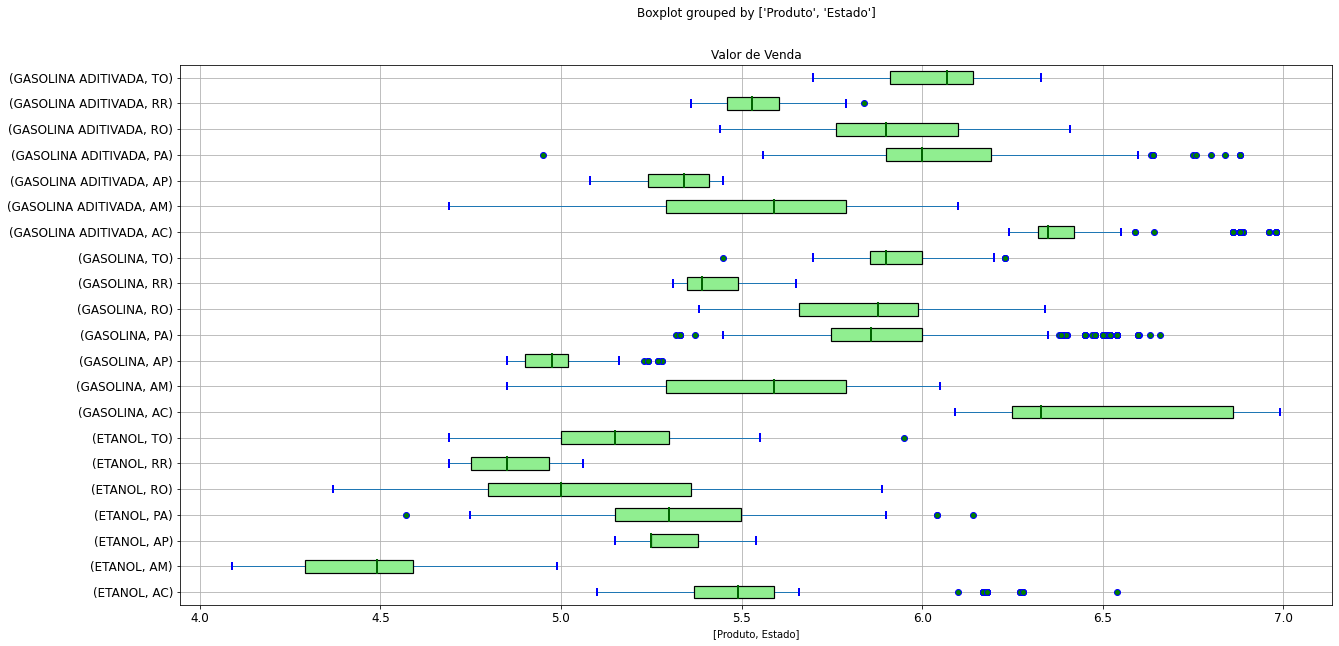

In [ ]:
combustiveis.loc[combustiveis["Região"] == "N"].boxplot(by=["Produto", "Estado"],
  figsize=(20, 10),
  fontsize=12,
  vert=False,
  patch_artist=True,
  boxprops={"linewidth": 1.2, "facecolor": "lightgreen"},
  capprops={"color": "blue", "linewidth": 2},
  medianprops={"color": "darkgreen", "linewidth": 2},
  flierprops=dict(marker="o", markerfacecolor="green", 
                  markersize=6, markeredgecolor="blue"))
#ignorar aviso
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

####<font color='gray'>Região Centro-Oeste</gray>

In [ ]:
combustiveis_centro_oeste = combustiveis.loc[combustiveis["Região"] == "CO"]
combustiveis_centro_oeste_etanol = combustiveis_centro_oeste[combustiveis_centro_oeste["Produto"] == "ETANOL"]["Valor de Venda"]
combustiveis_centro_oeste_gasolina = combustiveis_centro_oeste[combustiveis_centro_oeste["Produto"] == "GASOLINA"]["Valor de Venda"]
combustiveis_centro_oeste_gasolina_aditivada = combustiveis_centro_oeste[combustiveis_centro_oeste["Produto"] == "GASOLINA ADITIVADA"]["Valor de Venda"]

In [ ]:
combustiveis_centro_oeste_pivotado = combustiveis.loc[combustiveis["Região"] == "CO"]
combustiveis_centro_oeste = combustiveis_centro_oeste_pivotado[["CNPJ da Revenda","Produto", 
                                                   "Data da Coleta", "Valor de Venda"]]
combustiveis_centro_oeste_pivotado = combustiveis_centro_oeste_pivotado.pivot(
  index = ["CNPJ da Revenda", "Data da Coleta"],
  columns = ["Produto"],
  values = ["Valor de Venda"]
)
combustiveis_centro_oeste_pivotado.columns = combustiveis_centro_oeste_pivotado.columns.droplevel()
combustiveis_centro_oeste_pivotado

Produto                             ETANOL  GASOLINA  GASOLINA ADITIVADA
CNPJ da Revenda     Data da Coleta                                      
 00.001.974/0001-90 14/07/2021       4.969     5.969               6.069
 00.005.892/0001-13 02/06/2021       4.890     5.539               5.639
                    07/07/2021       4.890     5.499               5.559
                    09/06/2021       4.890     5.539               5.639
                    16/06/2021       4.890     5.499               5.599
...                                    ...       ...                 ...
 97.521.669/0001-60 15/06/2021       4.599     5.999               6.049
                    15/07/2021       4.670     6.370               6.420
                    21/07/2021       4.670     6.370               6.420
                    22/06/2021       4.359     5.949               5.999
 97.550.180/0001-17 29/06/2021       3.899     5.799               5.899

[3047 rows x 3 columns]

In [ ]:
combustiveis_pivotado_preenchidos_com_zero = combustiveis_centro_oeste_pivotado.fillna(0)
combustiveis_pivotado_preenchidos_com_zero.corr()

Produto,ETANOL,GASOLINA,GASOLINA ADITIVADA
Produto,,,
ETANOL,1.000000,0.061186,0.138900
GASOLINA,0.061186,1.000000,0.040913
GASOLINA ADITIVADA,0.138900,0.040913,1.000000


In [ ]:
combustiveis_pivotado_sem_nulos = combustiveis_centro_oeste_pivotado.dropna()
combustiveis_pivotado_sem_nulos.corr()

Produto,ETANOL,GASOLINA,GASOLINA ADITIVADA
Produto,,,
ETANOL,1.000000,0.341124,0.326915
GASOLINA,0.341124,1.000000,0.899219
GASOLINA ADITIVADA,0.326915,0.899219,1.000000


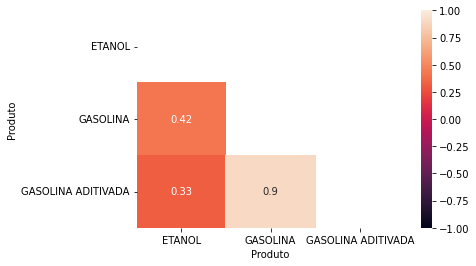

In [ ]:
correlacao = combustiveis_centro_oeste_pivotado.corr()
heatmap = sns.heatmap(correlacao, mask=np.triu(correlacao), vmin=-1, vmax=1, annot=True)

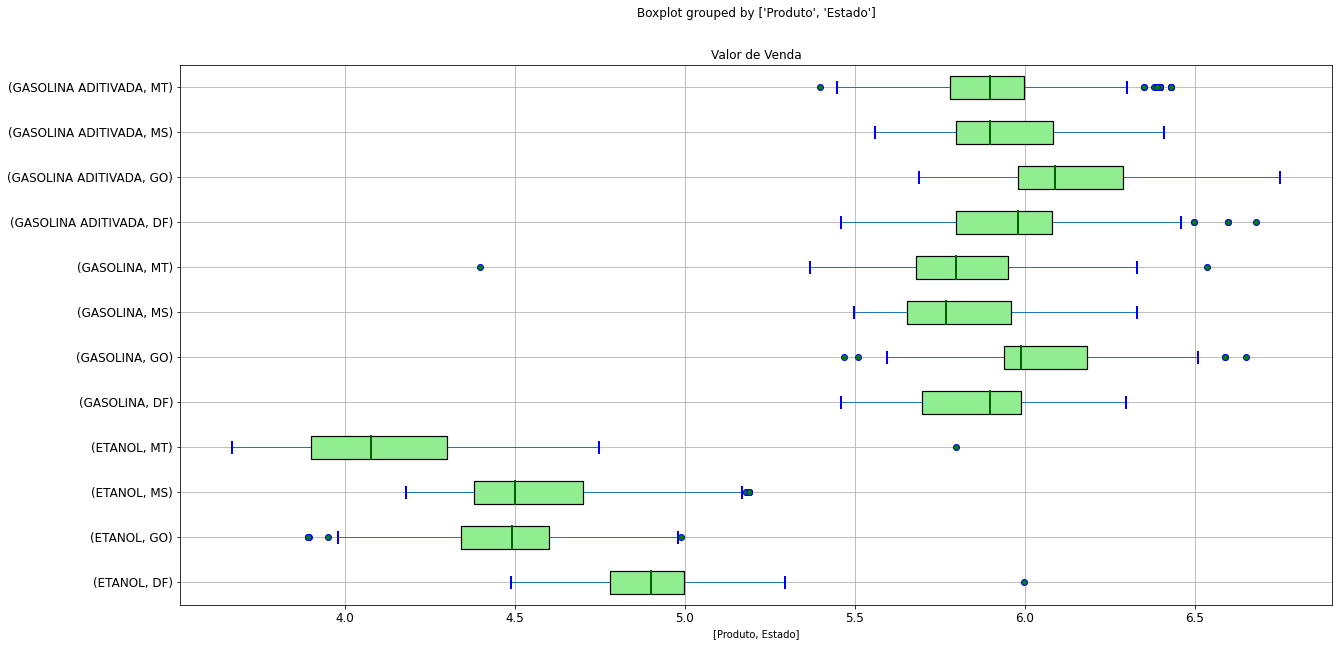

In [ ]:
combustiveis.loc[combustiveis["Região"] == "CO"].boxplot(by=["Produto", "Estado"],
  figsize=(20, 10),
  fontsize=12,
  vert=False,
  patch_artist=True,
  boxprops={"linewidth": 1.2, "facecolor": "lightgreen"},
  capprops={"color": "blue", "linewidth": 2},
  medianprops={"color": "darkgreen", "linewidth": 2},
  flierprops=dict(marker="o", markerfacecolor="green", 
                  markersize=6, markeredgecolor="blue"))
#ignorar aviso
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

####<font color='gray'>Região Sudeste</gray>

In [ ]:
combustiveis_sudeste = combustiveis.loc[combustiveis["Região"] == "SE"]
combustiveis_sudeste_etanol = combustiveis_sudeste[combustiveis_sudeste["Produto"] == "ETANOL"]["Valor de Venda"]
combustiveis_sudeste_gasolina = combustiveis_sudeste[combustiveis_sudeste["Produto"] == "GASOLINA"]["Valor de Venda"]
combustiveis_sudeste_gasolina_aditivada = combustiveis_sudeste[combustiveis_sudeste["Produto"] == "GASOLINA ADITIVADA"]["Valor de Venda"]

In [ ]:
combustiveis_sudeste_pivotado = combustiveis.loc[combustiveis["Região"] == "SE"]
combustiveis_sudeste = combustiveis_sudeste_pivotado[["CNPJ da Revenda","Produto", 
                                                   "Data da Coleta", "Valor de Venda"]]
combustiveis_sudeste_pivotado = combustiveis_sudeste_pivotado.pivot(
  index = ["CNPJ da Revenda", "Data da Coleta"],
  columns = ["Produto"],
  values = ["Valor de Venda"]
)
combustiveis_sudeste_pivotado.columns = combustiveis_sudeste_pivotado.columns.droplevel()
combustiveis_sudeste_pivotado

Produto                             ETANOL  GASOLINA  GASOLINA ADITIVADA
CNPJ da Revenda     Data da Coleta                                      
 00.002.953/0001-99 06/07/2021         NaN     5.390               5.570
                    12/07/2021       4.090     5.490               5.670
                    14/06/2021       4.190     5.390               5.570
                    20/07/2021       4.090     5.490               5.670
                    23/06/2021       4.190     5.390               5.570
...                                    ...       ...                 ...
 97.526.192/0001-06 29/07/2021       4.499     6.149               6.249
                    30/06/2021       4.499     5.999               6.099
 97.531.250/0001-90 08/06/2021       4.049     5.149                 NaN
                    14/06/2021       4.099     5.249                 NaN
                    28/06/2021       3.979     5.249                 NaN

[18757 rows x 3 columns]

In [ ]:
combustiveis_pivotado_preenchidos_com_zero = combustiveis_sudeste_pivotado.fillna(0)
combustiveis_pivotado_preenchidos_com_zero.corr()

Produto,ETANOL,GASOLINA,GASOLINA ADITIVADA
Produto,,,
ETANOL,1.000000,0.320466,0.157178
GASOLINA,0.320466,1.000000,0.101938
GASOLINA ADITIVADA,0.157178,0.101938,1.000000


In [ ]:
combustiveis_pivotado_sem_nulos = combustiveis_sudeste_pivotado.dropna()
combustiveis_pivotado_sem_nulos.corr()

Produto,ETANOL,GASOLINA,GASOLINA ADITIVADA
Produto,,,
ETANOL,1.000000,0.847227,0.801987
GASOLINA,0.847227,1.000000,0.948857
GASOLINA ADITIVADA,0.801987,0.948857,1.000000


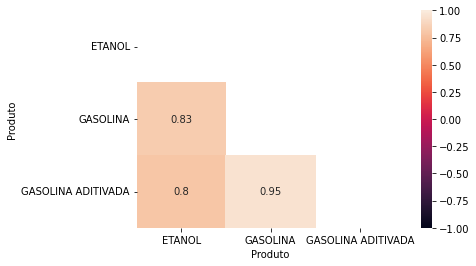

In [ ]:
correlacao = combustiveis_sudeste_pivotado.corr()
heatmap = sns.heatmap(correlacao, mask=np.triu(correlacao), vmin=-1, vmax=1, annot=True)

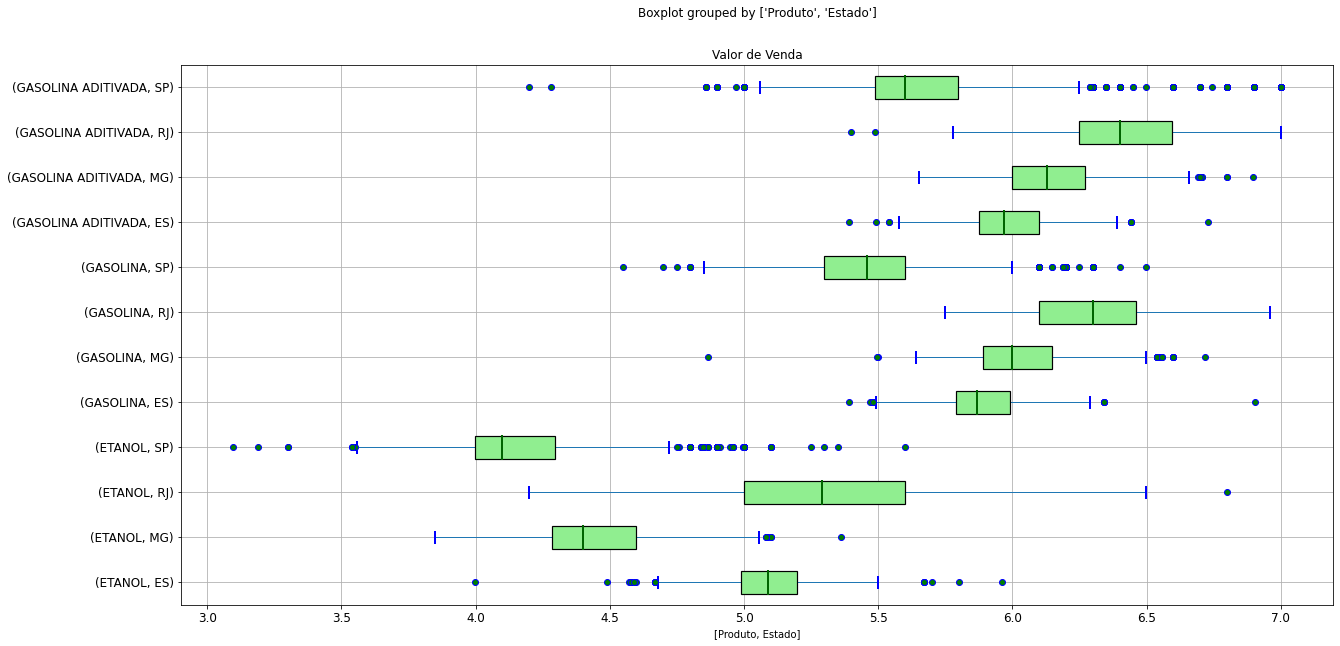

In [ ]:
combustiveis.loc[combustiveis["Região"] == "SE"].boxplot(by=["Produto", "Estado"],
 figsize=(20, 10),
  fontsize=12,
  vert=False,
  patch_artist=True,
  boxprops={"linewidth": 1.2, "facecolor": "lightgreen"},
  capprops={"color": "blue", "linewidth": 2},
  medianprops={"color": "darkgreen", "linewidth": 2},
  flierprops=dict(marker="o", markerfacecolor="green", 
                  markersize=6, markeredgecolor="blue"))
#ignorar aviso
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

####<font color='gray'>Região Sul</gray>

In [ ]:
combustiveis_sul = combustiveis.loc[combustiveis["Região"] == "S"]
combustiveis_sul_etanol = combustiveis_sul[combustiveis_sul["Produto"] == "ETANOL"]["Valor de Venda"]
combustiveis_sul_gasolina = combustiveis_sul[combustiveis_sul["Produto"] == "GASOLINA"]["Valor de Venda"]
combustiveis_sul_gasolina_aditivada = combustiveis_sul[combustiveis_sul["Produto"] == "GASOLINA ADITIVADA"]["Valor de Venda"]

In [ ]:
combustiveis_sul_pivotado = combustiveis.loc[combustiveis["Região"] == "S"]
combustiveis_sul = combustiveis_sul_pivotado[["CNPJ da Revenda","Produto", 
                                                   "Data da Coleta", "Valor de Venda"]]
combustiveis_sul_pivotado = combustiveis_sul_pivotado.pivot(
  index = ["CNPJ da Revenda", "Data da Coleta"],
  columns = ["Produto"],
  values = ["Valor de Venda"]
)
combustiveis_sul_pivotado.columns = combustiveis_sul_pivotado.columns.droplevel()
combustiveis_sul_pivotado

Produto                             ETANOL  GASOLINA  GASOLINA ADITIVADA
CNPJ da Revenda     Data da Coleta                                      
 00.073.558/0001-05 28/07/2021       4.490     5.650               5.690
 00.073.935/0001-06 05/07/2021         NaN     5.579               5.679
                    07/06/2021         NaN     5.579               5.679
                    13/07/2021         NaN     5.579               5.679
                    15/06/2021         NaN     5.579               5.679
...                                    ...       ...                 ...
 97.219.463/0001-80 22/07/2021         NaN     6.169               6.299
                    24/06/2021         NaN     5.966               6.099
                    29/07/2021         NaN     6.169               6.299
 97.530.307/0001-36 02/06/2021       5.099     5.149               5.149
 98.338.072/0037-59 26/07/2021         NaN     6.249               6.339

[6366 rows x 3 columns]

In [ ]:
combustiveis_pivotado_preenchidos_com_zero = combustiveis_sul_pivotado.fillna(0)
combustiveis_pivotado_preenchidos_com_zero.corr()

Produto,ETANOL,GASOLINA,GASOLINA ADITIVADA
Produto,,,
ETANOL,1.000000,-0.155300,-0.143355
GASOLINA,-0.155300,1.000000,0.213564
GASOLINA ADITIVADA,-0.143355,0.213564,1.000000


In [ ]:
combustiveis_pivotado_sem_nulos = combustiveis_sul_pivotado.dropna()
combustiveis_pivotado_sem_nulos.corr()

Produto,ETANOL,GASOLINA,GASOLINA ADITIVADA
Produto,,,
ETANOL,1.000000,0.741775,0.703891
GASOLINA,0.741775,1.000000,0.950206
GASOLINA ADITIVADA,0.703891,0.950206,1.000000


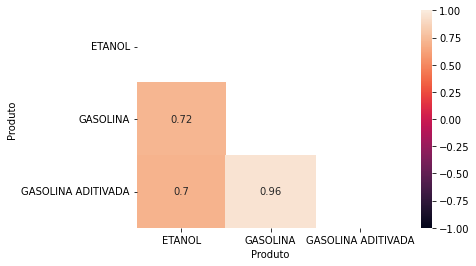

In [ ]:
correlacao = combustiveis_sul_pivotado.corr()
heatmap = sns.heatmap(correlacao, mask=np.triu(correlacao), vmin=-1, vmax=1, annot=True)

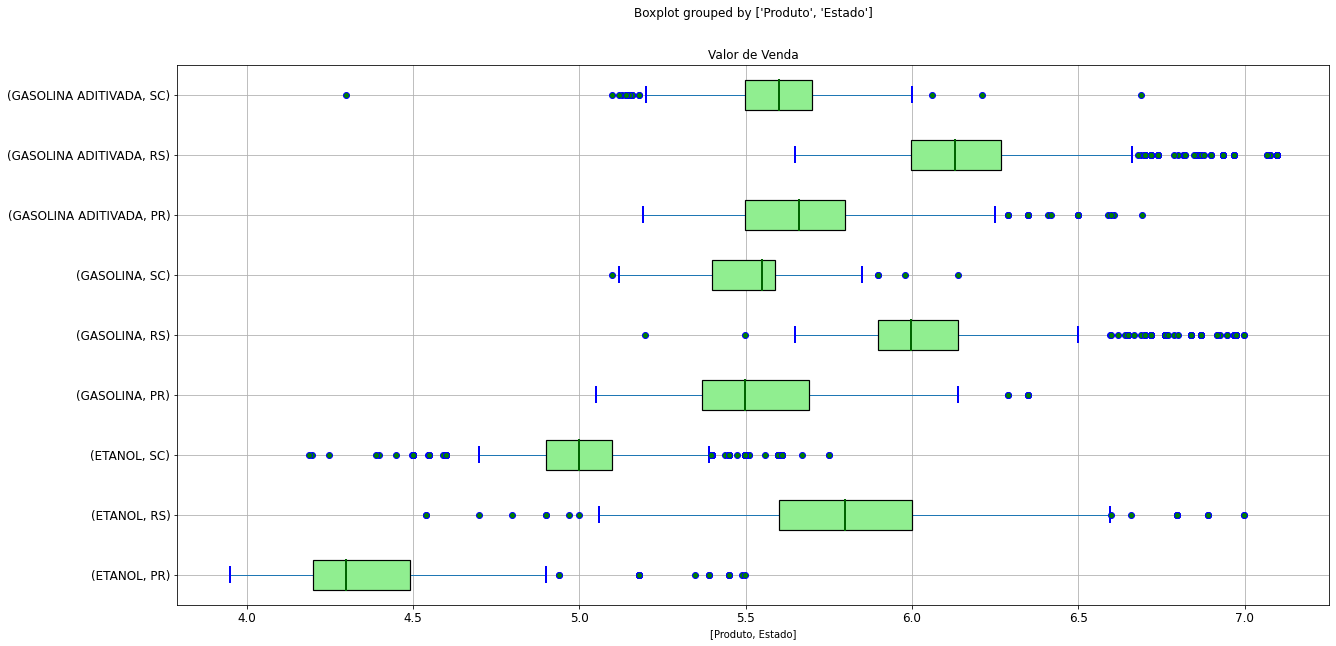

In [ ]:
combustiveis.loc[combustiveis["Região"] == "S"].boxplot(by=["Produto", "Estado"],
 figsize=(20, 10),
  fontsize=12,
  vert=False,
  patch_artist=True,
  boxprops={"linewidth": 1.2, "facecolor": "lightgreen"},
  capprops={"color": "blue", "linewidth": 2},
  medianprops={"color": "darkgreen", "linewidth": 2},
  flierprops=dict(marker="o", markerfacecolor="green", 
                  markersize=6, markeredgecolor="blue"))
#ignorar aviso
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

##<font color='gray'>Combustíveis agrupados por Estado</font>



###<font color='cian'>Etanol</font>

In [ ]:
#Média combustíveis por Estado.
combustiveis_estado = combustiveis.groupby(["Estado", 'Produto'])
combustiveis_estado["Valor de Venda"].mean()

Estado  Produto           
AC      ETANOL                5.535494
        GASOLINA              6.442674
        GASOLINA ADITIVADA    6.424368
AL      ETANOL                5.187422
        GASOLINA              5.958407
                                ...   
SP      GASOLINA              5.462376
        GASOLINA ADITIVADA    5.630282
TO      ETANOL                5.132937
        GASOLINA              5.933630
        GASOLINA ADITIVADA    6.037338
Name: Valor de Venda, Length: 81, dtype: float64

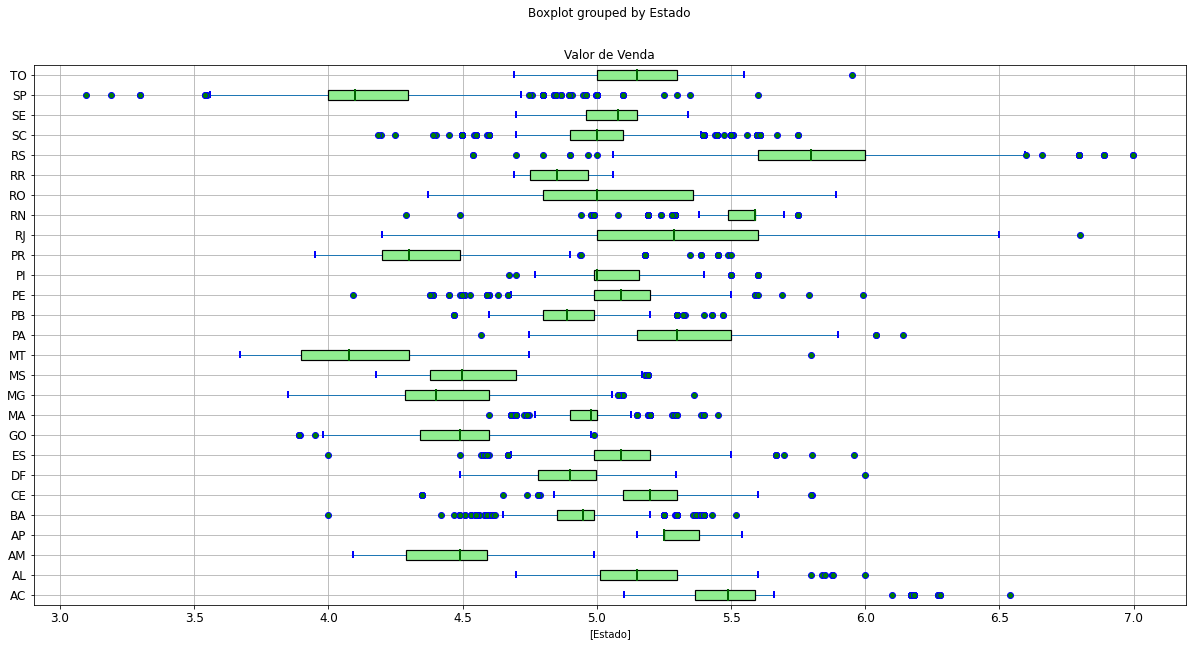

In [ ]:
#Valor Etanol por Estado
etanol = combustiveis.loc[combustiveis["Produto"] == "ETANOL"].boxplot(by=["Estado"],
  figsize=(20, 10),
  fontsize=12,
  vert=False,
  patch_artist=True,
  boxprops={"linewidth": 1.2, "facecolor": "lightgreen"},
  capprops={"color": "blue", "linewidth": 2},
  medianprops={"color": "darkgreen", "linewidth": 2},
  flierprops=dict(marker="o", markerfacecolor="green", 
                  markersize=6, markeredgecolor="blue"))
#ignorar aviso
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

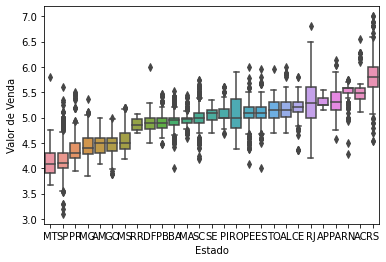

In [ ]:
#CORRIGIR VISUALIZAÇÃO DOS ESTADOS
etanol = combustiveis.loc[combustiveis["Produto"] == "ETANOL"]
grouped = etanol.groupby(["Estado"]).mean().sort_values(by="Valor de Venda")
grouped

sns.boxplot(x=etanol["Estado"], y=etanol["Valor de Venda"], order=grouped.index)
#ignorar aviso
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

###<font color='cian'>Gasolina</font>

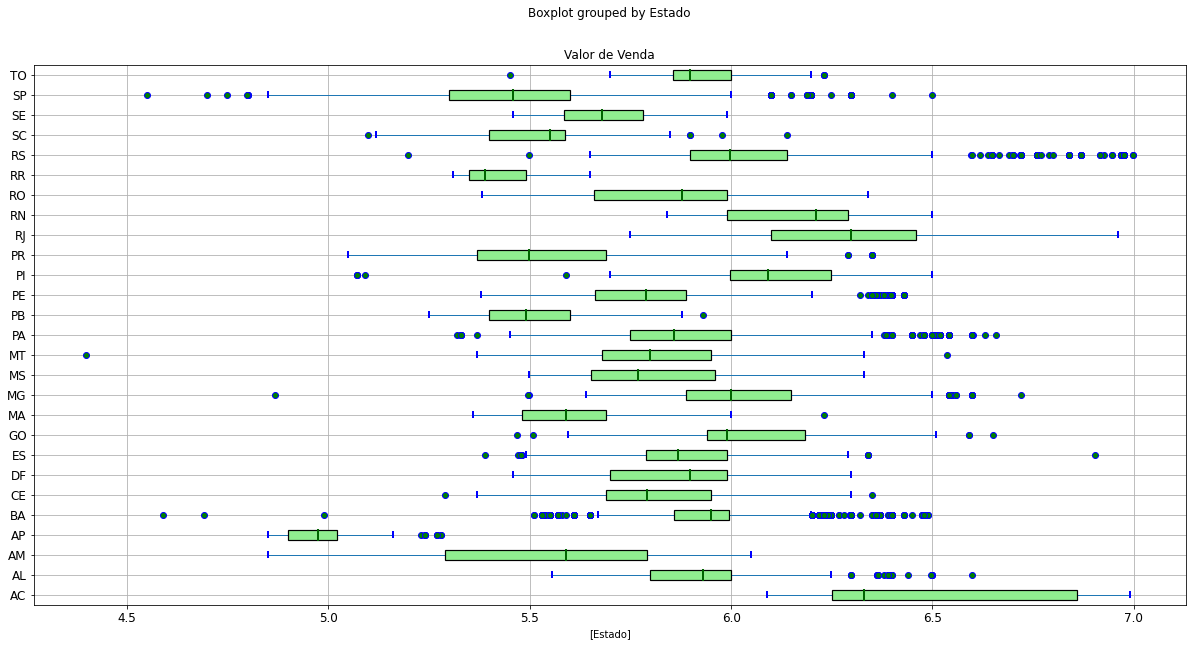

In [ ]:
#Valor Gasolina por Estado
gasolina = combustiveis.loc[combustiveis["Produto"] == "GASOLINA"].boxplot(by=["Estado"],
  figsize=(20, 10),
  fontsize=12,
  vert=False,
  patch_artist=True,
  boxprops={"linewidth": 1.2, "facecolor": "lightgreen"},
  capprops={"color": "blue", "linewidth": 2},
  medianprops={"color": "darkgreen", "linewidth": 2},
  flierprops=dict(marker="o", markerfacecolor="green", 
                  markersize=6, markeredgecolor="blue"))

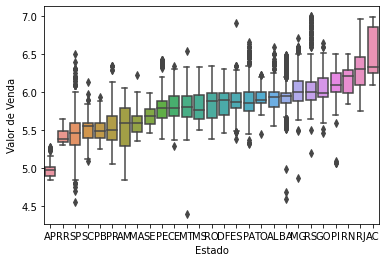

In [ ]:
#CORRIGIR VISUALIZAÇÃO DOS ESTADOS
gasolina = combustiveis.loc[combustiveis["Produto"] == "GASOLINA"]
grouped = gasolina.groupby(["Estado"]).mean().sort_values(by="Valor de Venda")
grouped

sns.boxplot(x=gasolina["Estado"], y=gasolina["Valor de Venda"], order=grouped.index)

###<font color='cian'>Gasolina Aditivada</font>

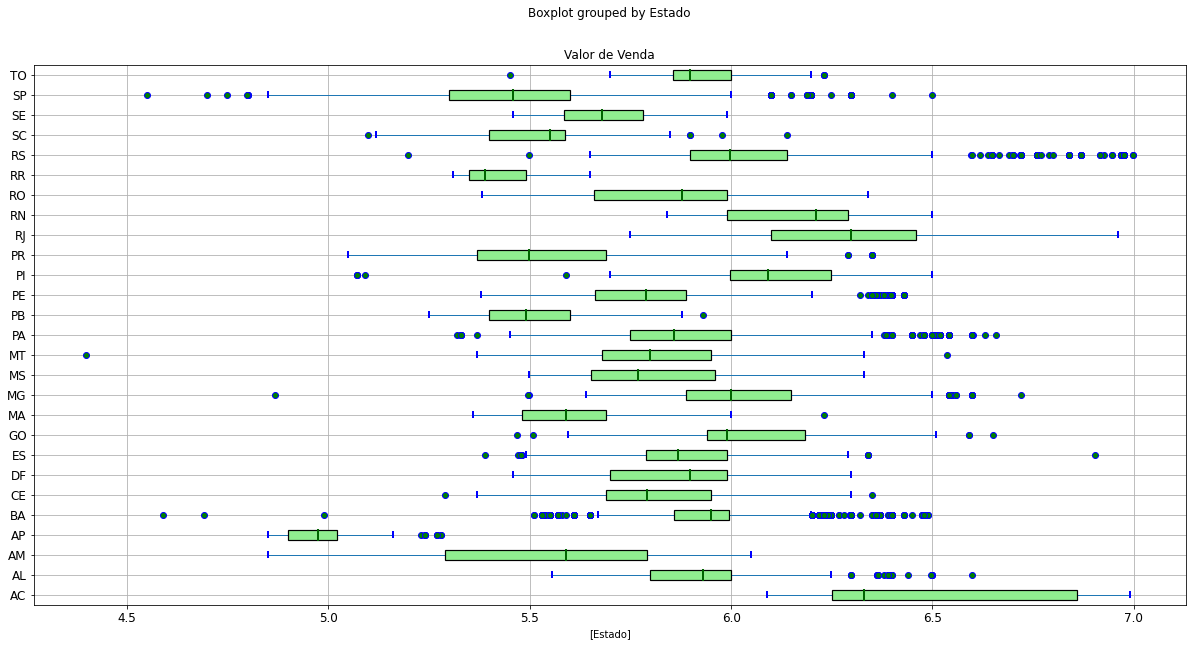

In [ ]:
#Valor Gasolina Aditivada por Estado
gasolina_aditivada = combustiveis.loc[combustiveis["Produto"] == "GASOLINA"].boxplot(by=["Estado"],
  figsize=(20, 10),
  fontsize=12,
  vert=False,
  patch_artist=True,
  boxprops={"linewidth": 1.2, "facecolor": "lightgreen"},
  capprops={"color": "blue", "linewidth": 2},
  medianprops={"color": "darkgreen", "linewidth": 2},
  flierprops=dict(marker="o", markerfacecolor="green", 
                  markersize=6, markeredgecolor="blue"))
#ignorar aviso
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

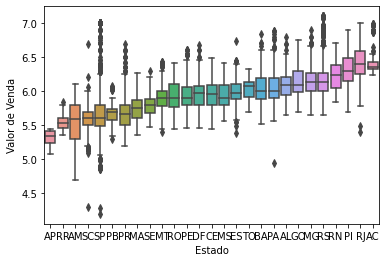

In [ ]:
#CORRIGIR VISUALIZAÇÃO DOS ESTADOS
gasolina_aditivada = combustiveis.loc[combustiveis["Produto"] == "GASOLINA ADITIVADA"]
grouped = gasolina_aditivada.groupby(["Estado"]).mean().sort_values(by="Valor de Venda")
grouped

sns.boxplot(x=gasolina_aditivada["Estado"], y=gasolina_aditivada["Valor de Venda"], order=grouped.index)
#ignorar aviso
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

TESTANDO...

In [ ]:
combustiveis.index

RangeIndex(start=0, stop=97586, step=1)

In [ ]:
combustiveis.count()

Região               97586
Estado               97586
Município            97586
Revenda              97586
CNPJ da Revenda      97586
Nome da Rua          97586
Número               97529
Complemento          19711
Bairro               97327
Cep                  97586
Produto              97586
Data da Coleta       97586
Valor de Venda       97586
Unidade de Medida    97586
Bandeira             97586
dtype: int64

In [ ]:
combustiveis.describe()

,Valor de Venda
count,97586.000000
mean,5.384929
std,0.715136
min,3.097000
25%,4.990000
50%,5.550000
75%,5.899000
max,7.097000


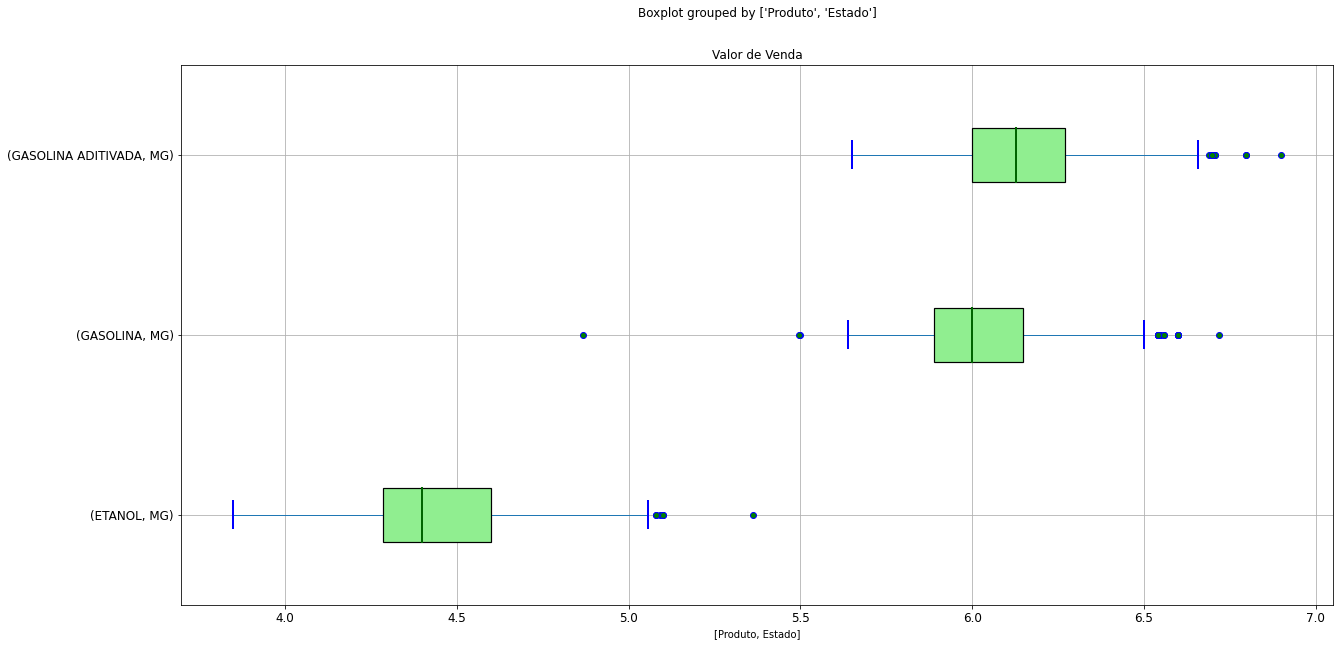

In [ ]:
#preços de combustiveis em MG
combustiveis.loc[combustiveis["Estado"] == "MG"].boxplot(by=["Produto", "Estado"],
 figsize=(20, 10),
  fontsize=12,
  vert=False,
  patch_artist=True,
  boxprops={"linewidth": 1.2, "facecolor": "lightgreen"},
  capprops={"color": "blue", "linewidth": 2},
  medianprops={"color": "darkgreen", "linewidth": 2},
  flierprops=dict(marker="o", markerfacecolor="green", 
                  markersize=6, markeredgecolor="blue"))
#ignorar aviso
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

#<font color='Green'>Perguntas</font>

In [ ]:
combustiveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97586 entries, 0 to 97585
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Região             97586 non-null  object 
 1   Estado             97586 non-null  object 
 2   Município          97586 non-null  object 
 3   Revenda            97586 non-null  object 
 4   CNPJ da Revenda    97586 non-null  object 
 5   Nome da Rua        97586 non-null  object 
 6   Número             97529 non-null  object 
 7   Complemento        19711 non-null  object 
 8   Bairro             97327 non-null  object 
 9   Cep                97586 non-null  object 
 10  Produto            97586 non-null  object 
 11  Data da Coleta     97586 non-null  object 
 12  Valor de Venda     97586 non-null  float64
 13  Unidade de Medida  97586 non-null  object 
 14  Bandeira           97586 non-null  object 
dtypes: float64(1), object(14)
memory usage: 11.2+ MB


In [ ]:
#Alteração do tipo da "Data da Coleta" de "object" para "datetime"

combustiveis["Data da Coleta"] = pd.to_datetime(combustiveis["Data da Coleta"], format="%d/%m/%Y")

In [ ]:
#Confirmando alteração "Data da Coleta" 
combustiveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97586 entries, 0 to 97585
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Região             97586 non-null  object        
 1   Estado             97586 non-null  object        
 2   Município          97586 non-null  object        
 3   Revenda            97586 non-null  object        
 4   CNPJ da Revenda    97586 non-null  object        
 5   Nome da Rua        97586 non-null  object        
 6   Número             97529 non-null  object        
 7   Complemento        19711 non-null  object        
 8   Bairro             97327 non-null  object        
 9   Cep                97586 non-null  object        
 10  Produto            97586 non-null  object        
 11  Data da Coleta     97586 non-null  datetime64[ns]
 12  Valor de Venda     97586 non-null  float64       
 13  Unidade de Medida  97586 non-null  object        
 14  Bandei

## <font color='blue'>1) Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?</font>

In [ ]:

#Consulta por produto
etanol = combustiveis.query("Produto == 'ETANOL'")
etanol.describe()

,Valor de Venda
count,33096.000000
mean,4.581825
std,0.533944
min,3.097000
25%,4.159000
50%,4.399000
75%,4.997000
max,6.999000




*   Preço mínimo: `R$3,09`
*   Preço Máximo: `R$6,99`
*   Média: `R$4,58`
*   Dia de inicio da pesquisa(média): `01-06-2021` `R$4,51`
*   Último dia da pesquisa(média): `30-07-2021` `R$4,40`
*   Dia com maior valor(média): `18-06-2021`  `R$5,02`

In [ ]:
media_etanol = etanol.sort_values(["Data da Coleta"]).groupby("Data da Coleta")["Valor de Venda"].mean()
media_etanol

Data da Coleta
2021-06-01    4.517171
2021-06-02    4.496550
2021-06-03    4.727348
2021-06-04    4.844902
2021-06-06    4.832898
2021-06-07    4.578846
2021-06-08    4.499479
2021-06-09    4.534223
2021-06-10    4.614576
2021-06-11    4.320613
2021-06-13    4.784119
2021-06-14    4.596926
2021-06-15    4.546200
2021-06-16    4.560365
2021-06-17    4.646618
2021-06-18    5.024000
2021-06-20    4.860081
2021-06-21    4.569199
2021-06-22    4.580368
2021-06-23    4.491679
2021-06-24    4.628964
2021-06-25    4.384833
2021-06-27    4.887184
2021-06-28    4.516853
2021-06-29    4.436638
2021-06-30    4.559796
2021-07-01    4.514669
2021-07-04    4.836512
2021-07-05    4.496008
2021-07-06    4.479909
2021-07-07    4.532444
2021-07-08    4.583577
2021-07-09    4.849471
2021-07-11    4.807751
2021-07-12    4.515766
2021-07-13    4.595267
2021-07-14    4.559697
2021-07-15    4.571451
2021-07-16    4.584263
2021-07-18    4.840576
2021-07-19    4.570284
2021-07-20    4.601879
2021-07-21    4.557

In [ ]:
maximo_etanol = etanol.sort_values(["Data da Coleta"]).groupby("Data da Coleta")["Valor de Venda"].max()
maximo_etanol.head()

Data da Coleta
2021-06-01    6.100
2021-06-02    6.890
2021-06-03    5.999
2021-06-04    5.490
2021-06-06    5.999
Name: Valor de Venda, dtype: float64

In [ ]:
minimo_etanol = etanol.sort_values(["Data da Coleta"]).groupby("Data da Coleta")["Valor de Venda"].min()
minimo_etanol.head()

Data da Coleta
2021-06-01    3.799
2021-06-02    3.549
2021-06-03    3.699
2021-06-04    4.279
2021-06-06    3.709
Name: Valor de Venda, dtype: float64

In [ ]:
#Consulta por produto
gasolina = combustiveis.query("Produto == 'GASOLINA'")
gasolina.describe()

,Valor de Venda
count,36953.000000
mean,5.734739
std,0.348269
min,4.398000
25%,5.480000
50%,5.699000
75%,5.989000
max,6.999000


In [ ]:
media_gasolina = gasolina.sort_values(["Data da Coleta"]).groupby("Data da Coleta")["Valor de Venda"].mean()
media_gasolina

Data da Coleta
2021-06-01    5.632475
2021-06-02    5.637375
2021-06-03    5.689417
2021-06-04    5.765320
2021-06-06    5.753485
2021-06-07    5.682328
2021-06-08    5.623684
2021-06-09    5.626360
2021-06-10    5.726308
2021-06-11    5.716303
2021-06-13    5.717247
2021-06-14    5.654329
2021-06-15    5.667317
2021-06-16    5.627509
2021-06-17    5.808534
2021-06-18    5.909250
2021-06-20    5.700052
2021-06-21    5.699610
2021-06-22    5.680793
2021-06-23    5.647660
2021-06-24    5.734843
2021-06-25    5.605571
2021-06-27    5.768027
2021-06-28    5.657433
2021-06-29    5.661269
2021-06-30    5.682278
2021-07-01    5.720424
2021-07-04    5.722119
2021-07-05    5.675800
2021-07-06    5.713260
2021-07-07    5.768251
2021-07-08    5.841474
2021-07-09    6.098613
2021-07-11    5.849151
2021-07-12    5.775490
2021-07-13    5.831829
2021-07-14    5.824783
2021-07-15    5.844501
2021-07-16    5.846268
2021-07-18    5.862689
2021-07-19    5.825607
2021-07-20    5.848252
2021-07-21    5.784

*   Preço mínimo: `R$4,39`
*   Preço Máximo: `R$6,99`
*   Média: `R$5,73`
*   Dia de inicio da pesquisa(média): `01-06-2021` `R$5,63`
*   Último dia da pesquisa(média): `30-07-2021` `R$5,69`
*   Dia com maior valor(média): `09-07-2021`  `R$6,09`

In [ ]:
maximo_gasolina = gasolina.sort_values(["Data da Coleta"]).groupby("Data da Coleta")["Valor de Venda"].max()
maximo_gasolina.head()

Data da Coleta
2021-06-01    6.890
2021-06-02    6.890
2021-06-03    6.599
2021-06-04    5.999
2021-06-06    6.699
Name: Valor de Venda, dtype: float64

In [ ]:
minimo_gasolina = gasolina.sort_values(["Data da Coleta"]).groupby("Data da Coleta")["Valor de Venda"].min()
minimo_gasolina.head()

Data da Coleta
2021-06-01    4.870
2021-06-02    4.398
2021-06-03    5.099
2021-06-04    5.390
2021-06-06    5.097
Name: Valor de Venda, dtype: float64

In [ ]:
#Consulta por produto
gasolina_aditivada = combustiveis.query("Produto == 'GASOLINA ADITIVADA'")
gasolina_aditivada.describe()

,Valor de Venda
count,27537.000000
mean,5.880734
std,0.348926
min,4.199000
25%,5.599000
50%,5.877000
75%,6.099000
max,7.097000


In [ ]:
media_gasolina_aditivada = gasolina_aditivada.sort_values(["Data da Coleta"]).groupby("Data da Coleta")["Valor de Venda"].mean()
media_gasolina_aditivada

Data da Coleta
2021-06-01    5.774615
2021-06-02    5.787184
2021-06-03    5.855201
2021-06-04    5.916216
2021-06-06    5.921119
2021-06-07    5.828956
2021-06-08    5.762978
2021-06-09    5.777356
2021-06-10    5.846858
2021-06-11    5.759789
2021-06-13    5.860327
2021-06-14    5.801977
2021-06-15    5.808034
2021-06-16    5.762899
2021-06-17    5.993306
2021-06-18    6.349000
2021-06-20    5.858171
2021-06-21    5.829794
2021-06-22    5.831913
2021-06-23    5.804677
2021-06-24    5.871457
2021-06-25    5.786000
2021-06-27    5.933478
2021-06-28    5.813694
2021-06-29    5.806587
2021-06-30    5.830213
2021-07-01    5.833324
2021-07-04    5.883320
2021-07-05    5.829935
2021-07-06    5.846378
2021-07-07    5.922523
2021-07-08    5.937177
2021-07-09    6.250789
2021-07-11    5.998106
2021-07-12    5.922044
2021-07-13    5.990151
2021-07-14    5.972033
2021-07-15    5.970587
2021-07-16    5.993429
2021-07-18    6.010424
2021-07-19    5.963544
2021-07-20    5.973533
2021-07-21    5.932

*   Preço mínimo: `R$4,19`
*   Preço Máximo: `R$7,09`
*   Média: `R$5,88`
*   Dia de inicio da pesquisa(média): `01-06-2021` `R$5,77`
*   Último dia da pesquisa(média): `30-07-2021` `R$5,79`
*   Dia com maior valor(média): `18-06-2021`  `R$6,34`

In [ ]:
maximo_gasolina_aditivada = gasolina_aditivada.sort_values(["Data da Coleta"]).groupby("Data da Coleta")["Valor de Venda"].max()
maximo_gasolina_aditivada.head()

Data da Coleta
2021-06-01    6.699
2021-06-02    6.999
2021-06-03    6.999
2021-06-04    6.290
2021-06-06    6.839
Name: Valor de Venda, dtype: float64

In [ ]:
minimo_gasolina_aditivada = gasolina_aditivada.sort_values(["Data da Coleta"]).groupby("Data da Coleta")["Valor de Venda"].min()
minimo_gasolina_aditivada.head()

Data da Coleta
2021-06-01    4.969
2021-06-02    5.077
2021-06-03    5.157
2021-06-04    5.390
2021-06-06    5.199
Name: Valor de Venda, dtype: float64

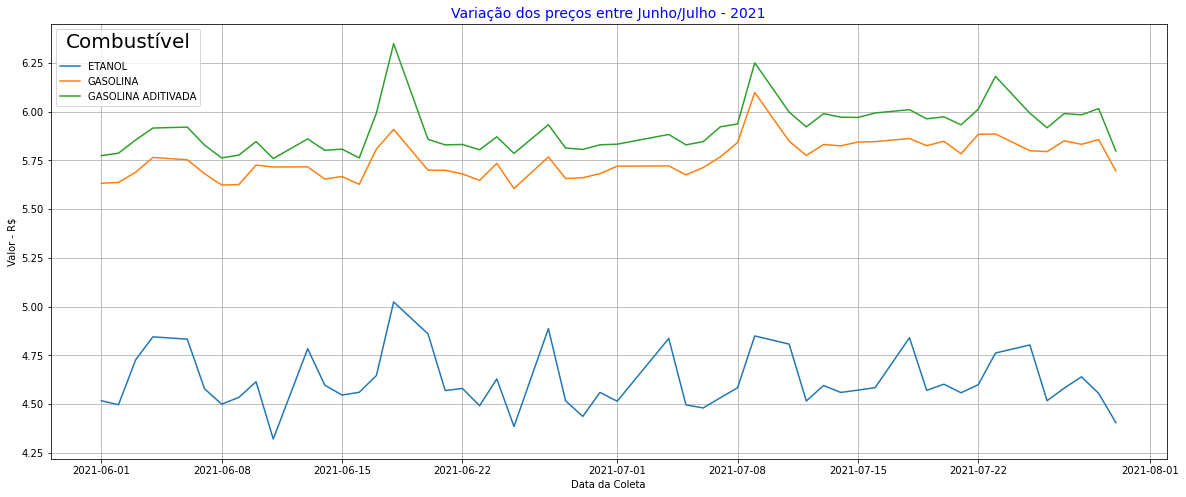

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

plt.grid(True)

# Títulos
plt.title("Variação dos preços entre Junho/Julho - 2021", loc="center", 
          fontsize=14, fontweight= 0, color="blue")
plt.xlabel("Data da Coleta")
plt.ylabel("Valor - R$")

# Variação dos preços de combustíveis no período

plt.plot(media_etanol)
plt.plot(media_gasolina)
plt.plot(media_gasolina_aditivada)

#Legenda

legend = plt.legend(["ETANOL", "GASOLINA", "GASOLINA ADITIVADA"], 
                    title = "Combustível", title_fontsize = 20)
legend._legend_box.sep = 10

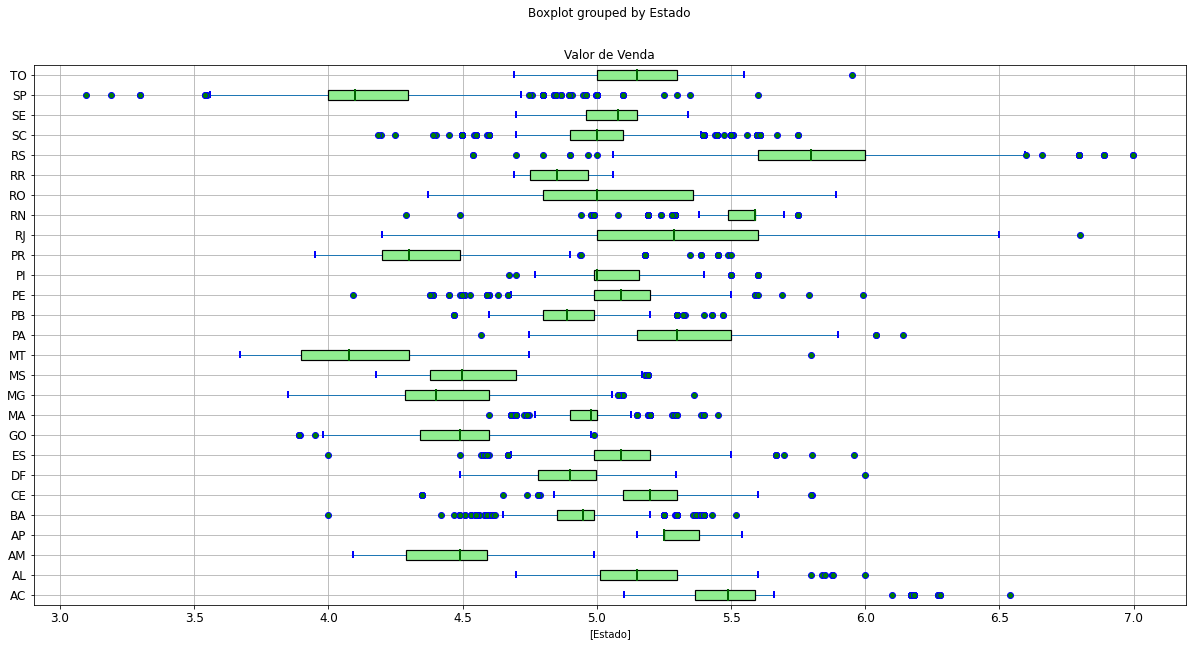

In [ ]:
#Comportamento valor do ETANOL por Estado.
combustiveis.loc[combustiveis["Produto"] == "ETANOL"].boxplot(by=["Estado"], 
  figsize=(20, 10),
  fontsize=12,
  vert=False,
  patch_artist=True,
  boxprops={"linewidth": 1.2, "facecolor": "lightgreen"},
  capprops={"color": "blue", "linewidth": 2},
  medianprops={"color": "darkgreen", "linewidth": 2},
  flierprops=dict(marker="o", markerfacecolor="green", 
                  markersize=6, markeredgecolor="blue"))

np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)


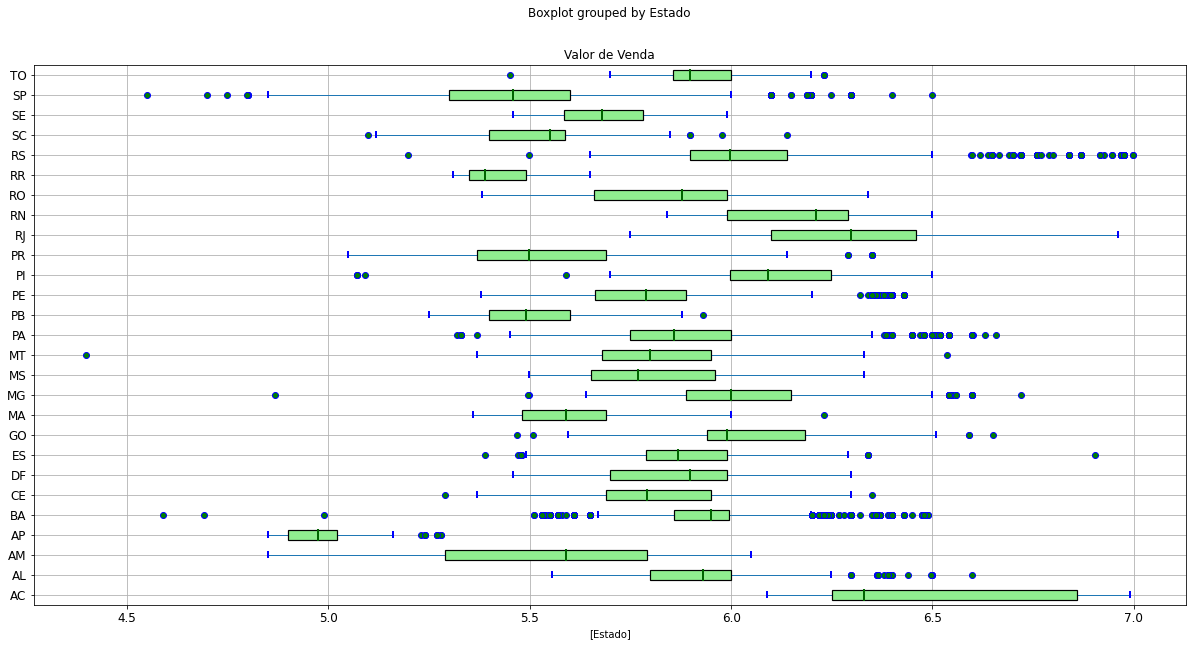

In [ ]:
#Comportamento valor da GASOLINA por Estado.
combustiveis.loc[combustiveis["Produto"] == "GASOLINA"].boxplot(by= ["Estado"], 
  figsize=(20, 10),
  fontsize=12,
  vert=False,
  patch_artist=True,
  boxprops={"linewidth": 1.2, "facecolor": "lightgreen"},
  capprops={"color": "blue", "linewidth": 2},
  medianprops={"color": "darkgreen", "linewidth": 2},
  flierprops=dict(marker="o", markerfacecolor="green", 
                  markersize=6, markeredgecolor="blue"))
#ignorar aviso
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

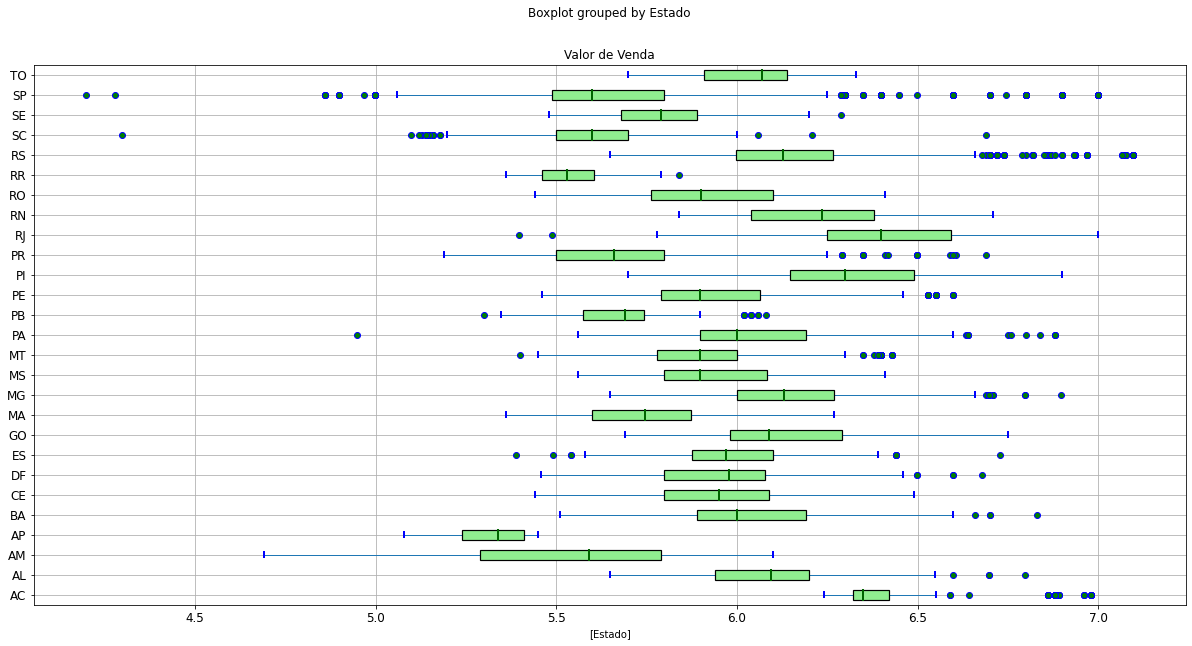

In [ ]:
#Comportamento Valor da GASOLINA ADITIVADA por Estado
combustiveis.loc[combustiveis["Produto"] == "GASOLINA ADITIVADA"].boxplot(by=["Estado"], 
 figsize=(20, 10),
 fontsize=12,
 vert=False,
 patch_artist=True,
 boxprops={"linewidth": 1.2, "facecolor": "lightgreen"},
 capprops={"color": "blue", "linewidth": 2},
 medianprops={"color": "darkgreen", "linewidth": 2},
 flierprops=dict(marker="o", markerfacecolor="green", 
                  markersize=6, markeredgecolor="blue"))
#ignorar aviso
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

##<font color='blue'>2) Qual o preço médio da gasolina e do etanol nesses dois meses?</font>

In [ ]:
media_produto = combustiveis.groupby("Produto").mean()
media_produto

,Valor de Venda
Produto,
ETANOL,4.581825
GASOLINA,5.734739
GASOLINA ADITIVADA,5.880734


##<font color='blue'>3) Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?</font>

In [ ]:
#Precisa ordenar
#Valor maior de "Etanol"
etanol = combustiveis.loc[combustiveis["Produto"] == "ETANOL"]
grouped = etanol.groupby(["Estado"]).mean().sort_values(by="Valor de Venda")
grouped.tail()

,Valor de Venda
Estado,
AP,5.314000
PA,5.333437
RN,5.524841
AC,5.535494
RS,5.806083


In [ ]:
#Precisa ordenar
#Valor maior de "Gasolina"
gasolina = combustiveis.loc[combustiveis["Produto"] == "GASOLINA"]
grouped = gasolina.groupby(["Estado"]).mean().sort_values(by="Valor de Venda")
grouped.tail()

,Valor de Venda
Estado,
GO,6.039623
PI,6.107937
RN,6.154723
RJ,6.298844
AC,6.442674


In [ ]:
#Precisa ordenar
#Valor maior de "Gasolina Aditivada"
gasolina = combustiveis.loc[combustiveis["Produto"] == "GASOLINA ADITIVADA"]
grouped = gasolina.groupby(["Estado"]).mean().sort_values(by="Valor de Venda")
grouped.tail()

,Valor de Venda
Estado,
RS,6.145830
RN,6.210551
PI,6.309395
RJ,6.417112
AC,6.424368


##<font color='blue'>4) Qual o preço médio da gasolina e do etanol por estado?</font>

In [ ]:
#Qual melhor visualização(vertical/horizontal)???
#Como colocar em ordem alfabética o nome dos Estados no Gráfico?

combustiveis_estado = combustiveis.groupby(["Estado", "Produto"])
media_estado = combustiveis_estado["Valor de Venda"].mean().round(2) 

media_estado

Estado  Produto           
AC      ETANOL                5.54
        GASOLINA              6.44
        GASOLINA ADITIVADA    6.42
AL      ETANOL                5.19
        GASOLINA              5.96
                              ... 
SP      GASOLINA              5.46
        GASOLINA ADITIVADA    5.63
TO      ETANOL                5.13
        GASOLINA              5.93
        GASOLINA ADITIVADA    6.04
Name: Valor de Venda, Length: 81, dtype: float64

###<font color='cian'>Etanol</font>

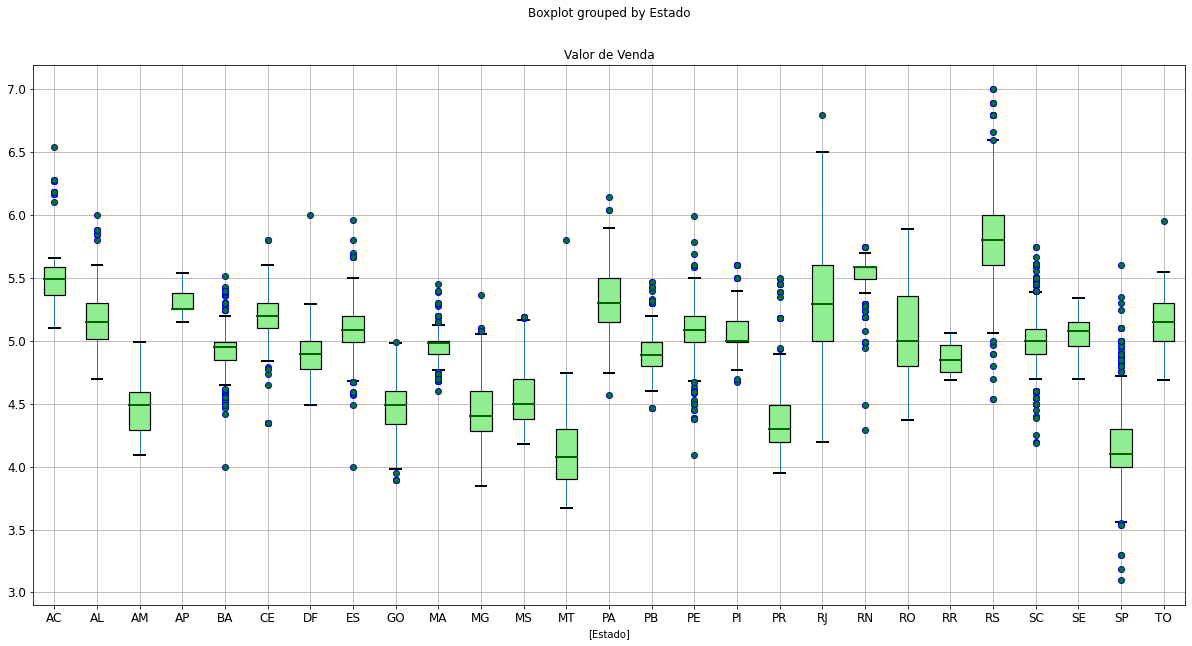

In [ ]:
etanol = combustiveis.loc[combustiveis["Produto"] == "ETANOL"]
etanol_estado = etanol.boxplot(
  by=["Estado"],
  figsize=(20, 10),
  fontsize=12,
  vert=True,
  patch_artist=True,
  boxprops={"linewidth": 1.2, "facecolor": "lightgreen"},
  capprops={"color": "black", "linewidth": 2},
  medianprops={"color": "darkgreen", "linewidth": 2},
  flierprops=dict(marker='o', markerfacecolor="green", markersize=6, markeredgecolor="blue"))

###<font color='cian'>Gasolina</font>

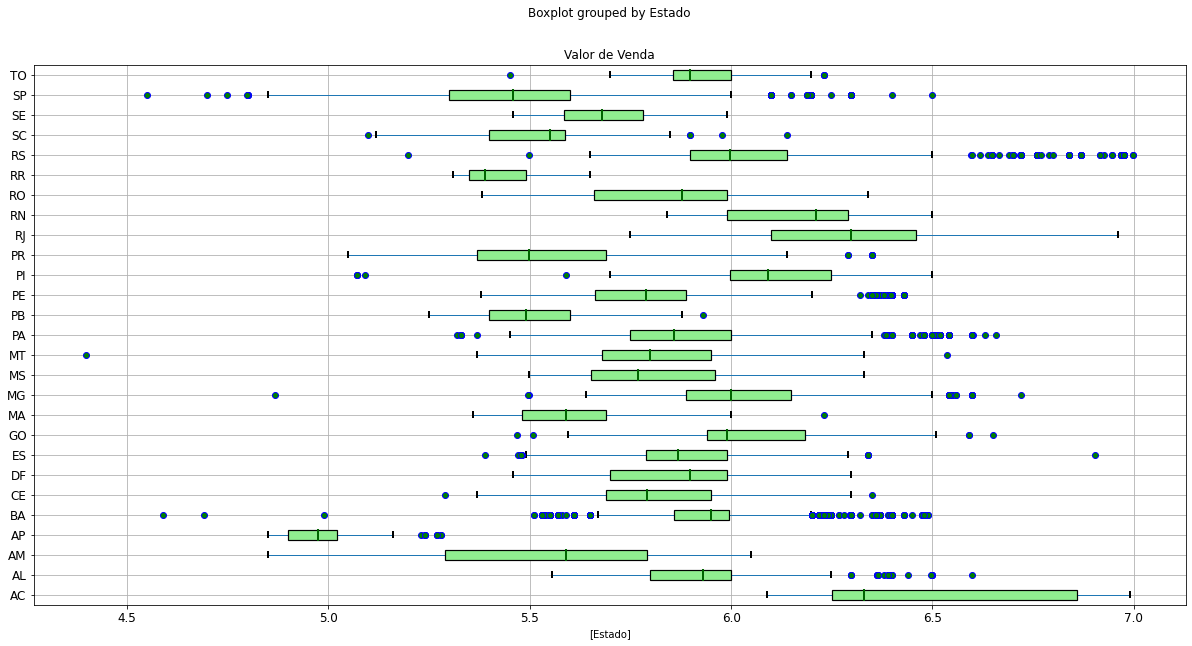

In [ ]:
gasolina = combustiveis.loc[combustiveis["Produto"] == "GASOLINA"]
gasolina_estado = gasolina.boxplot(by=["Estado"],
  figsize=(20, 10),
  fontsize=12,
  vert=False,
  patch_artist=True,
  boxprops={"linewidth": 1.2, "facecolor": "lightgreen"},
  capprops={"color": "black", "linewidth": 2},
  medianprops={"color": "darkgreen", "linewidth": 2},
  flierprops=dict(marker='o', markerfacecolor="green", markersize=6, markeredgecolor="blue"))

###<font color='cian'>Gasolina Aditivada</font>

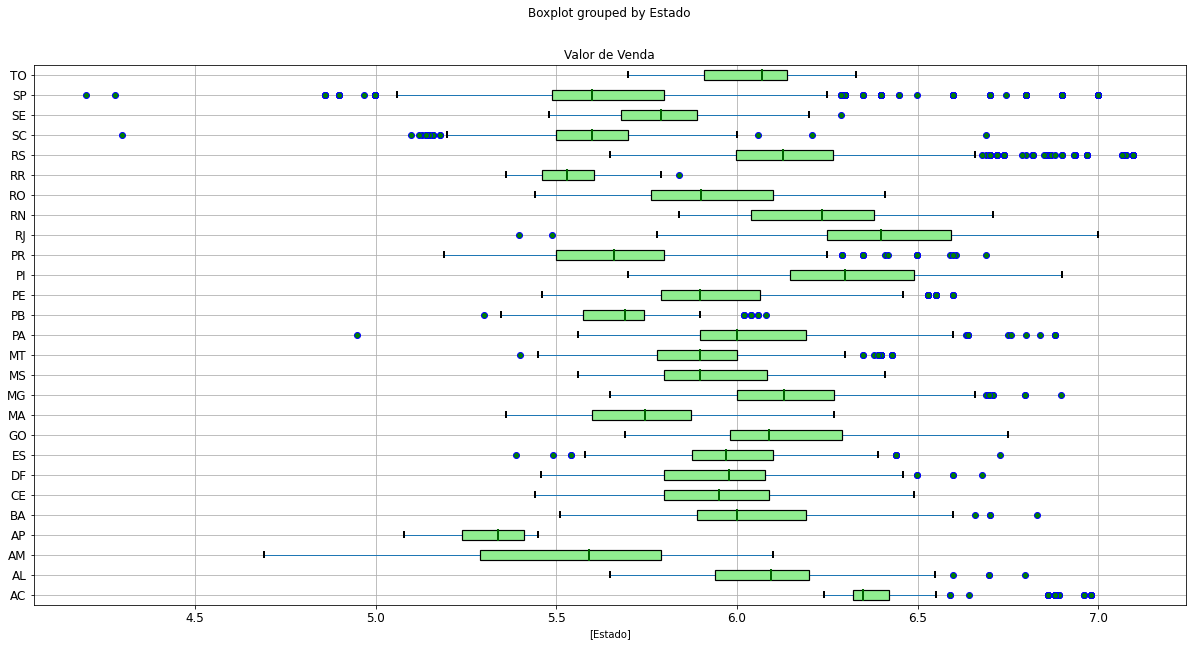

In [ ]:
gasolina_aditivada = combustiveis.loc[combustiveis["Produto"] == "GASOLINA ADITIVADA"]
gasolina_aditivada_estado = gasolina_aditivada.boxplot(by=["Estado"],
  figsize=(20, 10),
  fontsize=12,
  vert=False,
  patch_artist=True,
  boxprops={"linewidth": 1.2, "facecolor": "lightgreen"},
  capprops={"color": "black", "linewidth": 2},
  medianprops={"color": "darkgreen", "linewidth": 2},
  flierprops=dict(marker='o', markerfacecolor="green", markersize=6, markeredgecolor="blue"))

<Figure size 2160x1440 with 0 Axes>

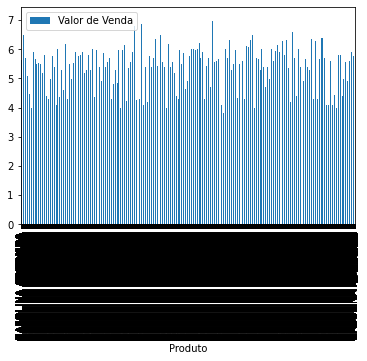

In [ ]:
#Como aumentar tamanho do gráfico e corrigir visualização?
plt.figure(figsize = (30, 20))
combustiveis.plot(x="Produto", y=["Valor de Venda", "Estado"], kind="bar")
#ignorar aviso
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

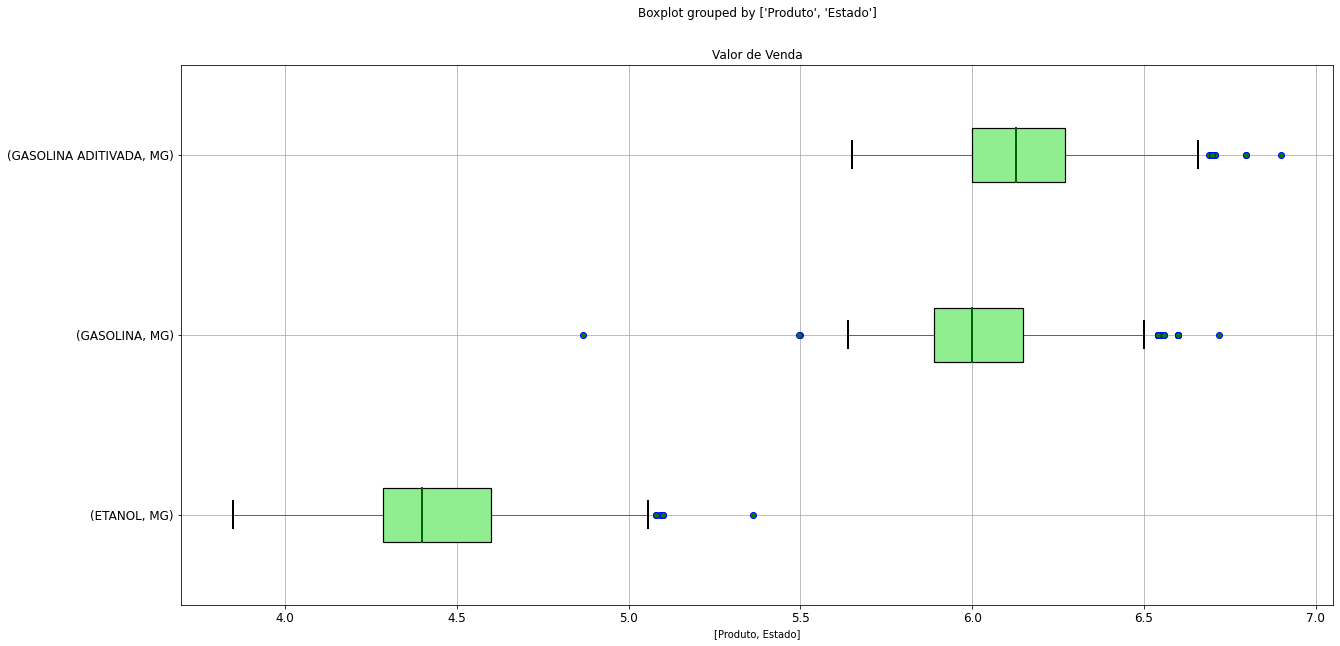

In [ ]:
#Exemplo Valor de Venda - MG
combustiveis.loc[combustiveis["Estado"] == "MG"].boxplot(by=["Produto", "Estado"], 
  figsize=(20, 10),
  fontsize=12,
  vert=False,
  patch_artist=True,
  boxprops={"linewidth": 1.2, "facecolor": "lightgreen"},
  capprops={"color": "black", "linewidth": 2},
  medianprops={"color": "darkgreen", "linewidth": 2},
  flierprops=dict(marker='o', markerfacecolor="green", markersize=6, markeredgecolor="blue"))
#ignorar aviso
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

In [ ]:
#Valor d venda dos combustiveis por Estado
combustiveis_teste = combustiveis[["Estado", "Produto", "Valor de Venda"]]
combustiveis_teste



,Estado,Produto,Valor de Venda
0,AC,GASOLINA,6.890
1,AC,GASOLINA ADITIVADA,6.890
2,AC,ETANOL,6.100
3,AC,GASOLINA,6.890
4,AC,GASOLINA,6.890
...,...,...,...
97581,ES,GASOLINA ADITIVADA,5.870
97582,ES,ETANOL,4.990
97583,ES,GASOLINA,5.870
97584,MG,ETANOL,4.599


##<font color='blue'>5) Qual o município que possui o menor preço para a gasolina e para o etanol?</font>

In [ ]:
valores_produto_municipio = combustiveis[["Produto", "Município", "Valor de Venda"]]
valores_produto_municipio.groupby("Produto").agg(["min"])

,Município,Valor de Venda
,min,min
Produto,,
ETANOL,ABAETETUBA,3.097
GASOLINA,ABAETETUBA,4.398
GASOLINA ADITIVADA,ABAETETUBA,4.199


##<font color='blue'>6) Qual o município que possui o maior preço para a gasolina e para o etanol?</font>

In [ ]:
#Município com valor maior de combustível

valores_produto_municipio = combustiveis[["Produto", "Município", "Valor de Venda"]]
valores_produto_municipio.groupby("Produto").agg(["max"])

,Município,Valor de Venda
,max,max
Produto,,
ETANOL,XANXERE,6.999
GASOLINA,XANXERE,6.999
GASOLINA ADITIVADA,XANXERE,7.097


##<font color='blue'>7) Qual a região que possui o maior valor médio da gasolina?</font>

In [ ]:
#Média dos valores de combustíveis por região
valores_regiao = combustiveis[["Produto", "Região", "Valor de Venda"]]
valores_regiao = valores_regiao.groupby(["Produto","Região"]).mean()
valores_regiao = valores_regiao.unstack()
valores_regiao.columns = valores_regiao.columns.droplevel()
valores_regiao.T

Produto,ETANOL,GASOLINA,GASOLINA ADITIVADA
Região,,,
CO,4.406943,5.901902,5.989400
N,5.046574,5.820873,5.949940
NE,5.090050,5.856517,5.992951
S,4.819885,5.705432,5.845881
SE,4.354765,5.663083,5.826678





*   Região com maior valor médio da `Gasolina` é a `Centro-Oeste` atingindo `R$5,98` no periodo de Junho/Julho 2021, contudo possui o segundo menor valor para o `Etanol` com média de `R$4,40`
*   Região `Sudeste` teve o menor valor médio de todos combustíveis neste mesmo período




##<font color='blue'>8) Qual a região que possui o menor valor médio do etanol?</font>

In [ ]:
etanol = combustiveis.loc[combustiveis["Produto"] == "ETANOL"]
grouped = etanol.groupby(["Região"]).mean().sort_values(by="Valor de Venda")
grouped


,Valor de Venda
Região,
SE,4.354765
CO,4.406943
S,4.819885
N,5.046574
NE,5.090050




*   Região `Sudeste` obteve menor valor médio de `R$4.35` por litro de `Etanol` entre Junho/Julho 2021


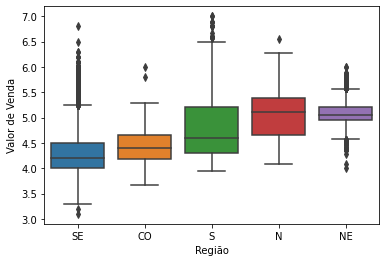

In [ ]:
sns.boxplot(x=etanol["Região"], y=etanol["Valor de Venda"], order=grouped.index)

In [ ]:
#Valor médio de todos combustíveis por Região
combustiveis_regiao = combustiveis.groupby(["Região", 'Produto'])
combustiveis_regiao["Valor de Venda"].mean()

Região  Produto           
CO      ETANOL                4.406943
        GASOLINA              5.901902
        GASOLINA ADITIVADA    5.989400
N       ETANOL                5.046574
        GASOLINA              5.820873
        GASOLINA ADITIVADA    5.949940
NE      ETANOL                5.090050
        GASOLINA              5.856517
        GASOLINA ADITIVADA    5.992951
S       ETANOL                4.819885
        GASOLINA              5.705432
        GASOLINA ADITIVADA    5.845881
SE      ETANOL                4.354765
        GASOLINA              5.663083
        GASOLINA ADITIVADA    5.826678
Name: Valor de Venda, dtype: float64

##<font color='blue'>9) Há alguma relação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?</font>

In [ ]:
#não entendi o pq do CNPJ
pivotado = combustiveis[["Região", "CNPJ da Revenda", "Produto", "Data da Coleta", "Valor de Venda"]]
pivotado = pivotado.pivot(
index = ["CNPJ da Revenda", "Data da Coleta"],
columns = ["Produto", "Região"],
values = ["Valor de Venda"]
)
pivotado.columns = pivotado.columns.droplevel()
pivotado.T.corr()

CNPJ da Revenda                     00.001.974/0001-90  ...  98.338.072/0037-59
Data da Coleta                              14/07/2021  ...          26/07/2021
CNPJ da Revenda     Data da Coleta                      ...                    
 00.001.974/0001-90 14/07/2021                1.000000  ...                 NaN
 00.002.953/0001-99 06/07/2021                     NaN  ...                 NaN
                    12/07/2021                     NaN  ...                 NaN
                    14/06/2021                     NaN  ...                 NaN
                    20/07/2021                     NaN  ...                 NaN
...                                                ...  ...                 ...
 97.535.910/0001-00 15/07/2021                     NaN  ...                 NaN
                    21/07/2021                     NaN  ...                 NaN
                    29/07/2021                     NaN  ...                 NaN
 97.550.180/0001-17 29/06/2021                0.999282  ...                 NaN
 98.338.072/0037-59 26/07/2021                     NaN  ...                 1.0

[37241 rows x 37241 columns]

In [ ]:
#não entendi
#conferir se a sintaxe está correta
def dados_do_mes(df, num):
  mask = combustiveis['Data da Coleta'].dt.month == num
  return combustiveis.loc[mask]
jn = junho.groupby(["Produto", "Região"]).mean()
jl = julho.groupby(["Produto", "Região"]).mean()
resultado = pd.concat([jl, jn], axis='columns').set_axis(['Junho', 'Julho'], 1)
sum((resultado['Junho'] - resultado['Julho']) > 0)/ len(resultado)
resultado.T.var()

KeyError: ignored

##<font color='blue'>10) Há alguma relação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?</font>

In [ ]:
pivotado = combustiveis[["Bandeira", "CNPJ da Revenda", "Produto", "Data da Coleta", "Valor de Venda"]]
pivotado = pivotado.pivot(
index = ["CNPJ da Revenda", "Data da Coleta"],
columns = ["Produto", "Bandeira"],
values = ["Valor de Venda"]
)
pivotado.columns = pivotado.columns.droplevel()
pivotado.T.corr()

In [ ]:
#conferir se a sintaxe está correta
def dados_do_mes(df, num):
  mask = combustiveis['Data da Coleta'].dt.month == num
  return combustiveis.loc[mask]
jn = junho.groupby(['Produto', 'Bandeira']).mean()
jl = julho.groupby(['Produto', 'Bandeira']).mean()
resultado = pd.concat([jl, jn], axis='columns').set_axis(['Junho', 'Julho'], 1)
sum((resultado['Junho'] - resultado['Julho']) > 0)/ len(resultado)
resultado.T.var()

In [ ]:
combustiveis['Bandeira'].unique().shape

In [ ]:
c = resultado.T.cov()
c.fillna(0)

In [ ]:
plt.figure(figsize = (160,160))
heatmap = sns.heatmap(c, mask=np.triu(c), vmin=-1, vmax=1)

In [ ]:
np.random.seed(1)
a = np.random.random(10)
print(a * 1)
np.diff(a)

TESTES

In [ ]:
combustiveis.groupby(by=["Produto", "Bandeira"]).mean("Valor de Venda")

In [ ]:
combustiveis.groupby(by=["Produto", "Bandeira"]).max("Valor de Venda")

In [ ]:
combustiveis.groupby(by=["Produto", "Bandeira"]).min("Valor de Venda")

In [ ]:
combustiveis.plot.scatter(x="Valor de Venda", y="Região")

In [ ]:
combustiveis.groupby(by=["Produto", "Região"]).max("Valor de Venda")